# Multi-Table Synthesis - Basic Usage

### How to synthesize data from a database schema

Relational databases (RDBMS) are a type of data storage that allows users to access data that is stored in various tables connected through primary and foreign keys. They serve a variety of different use cases, as they offer benefits such as security and reliability. 

For many data science scenarios, a single-table model is usually the go-to, but the truth is that RDBMS and table-like storages are important for more complex use cases, such as systems testing, replicating a database for customer segmentation, or even for data migrations between on-prem and the cloud. 

YData Fabric offers an easy-to-use and familiar interface through the SDK to support Multi-Table Synthesis. With the SDK and a few lines of code, users can replicate full relational databases while maintaining the consistency of all the keys and the statistical information of cross-table relations. 

[Berka](https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions) is the dataset chosen to demo Fabric Multi-Table synthesis properties and interface. 

## Getting the data from an RDBMS

We can load an RDBMS connector created through the Fabric platform using the code below.

In [1]:
from ydata.labs import Connectors
connector = Connectors.get(uid='<uid>', namespace='<namespace>').connector

We can now access the entire database by creating a `MultiDataset` that receives the connector.

In [2]:
from ydata.dataset.multidataset import MultiDataset

data = MultiDataset(connector)

Alternatively, it is possible to read only specific tables using the `get_tables` method from the connector and passing the list of tables. 
In the following example, we retrieve the database schema and ask for all available tables.

In [3]:
schema = connector.get_database_schema()
tables = list(schema.tables.keys())
data = connector.get_tables(tables)

To display the data of the `loan` table we can use the code below.

In [4]:
data['loan'].to_pandas()

,loan_id,account_id,date,amount,duration,payments,status,interest_rate,interest_amount
0,4959,2,940105,80952,24,3373.0,A,0.02,1619.04
1,4961,19,960429,30276,12,2523.0,B,0.04,1211.04
2,4962,25,971208,30276,12,2523.0,A,0.05,1513.80
3,4967,37,981014,318480,60,5308.0,D,0.01,3184.80
4,4968,38,980419,110736,48,2307.0,C,0.08,8858.88
...,...,...,...,...,...,...,...,...,...
677,7294,11327,980927,39168,24,1632.0,C,0.08,3133.44
678,7295,11328,980718,280440,60,4674.0,C,0.09,25239.60
679,7304,11349,951029,419880,60,6998.0,C,0.02,8397.60
680,7305,11359,960806,54024,12,4502.0,A,0.02,1080.48


## Synthesizer definition, training, and sampling

We need to start by creating the Metadata for the database tables.

In [5]:
from ydata.metadata.multimetadata import MultiMetadata

m = MultiMetadata(data)

We can now train the synthesizer by creating a `MultiTableSynthesizer` and passing the data and the metadata. Depending on the size of the database, the training may take a while.

In [6]:
from ydata.synthesizers.multitable.model import MultiTableSynthesizer

synth = MultiTableSynthesizer()
synth.fit(data, m)

INFO: 2023-12-29 11:48:08,177 (1/9) - Fitting table: [district]
INFO: 2023-12-29 11:48:09,170 [SYNTHESIZER] - Number columns considered for synth: 16
INFO: 2023-12-29 11:48:09,393 [SYNTHESIZER] - Starting the synthetic data modeling process over 1x1 blocks.
INFO: 2023-12-29 11:48:09,395 [SYNTHESIZER] - Preprocess segment
INFO: 2023-12-29 11:48:09,401 [SYNTHESIZER] - Synthesizer init.
INFO: 2023-12-29 11:48:09,401 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2023-12-29 11:48:09,561 (2/9) - Fitting table: [client]
INFO: 2023-12-29 11:48:11,164 [SYNTHESIZER] - Number columns considered for synth: 22
INFO: 2023-12-29 11:48:11,480 [SYNTHESIZER] - Starting the synthetic data modeling process over 1x1 blocks.
INFO: 2023-12-29 11:48:11,483 [SYNTHESIZER] - Preprocess segment
INFO: 2023-12-29 11:48:11,488 [SYNTHESIZER] - Synthesizer init.
INFO: 2023-12-29 11:48:11,489 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2023-12-29 11:48:12,436 (3/9

To generate the synthetic data we call the `sample` method.

Since there is a need to keep the consistency of the tables, as well as the referential integrity, to sample from trained synthesizers the number of records is set through a ratio based on the original number of records (e.g., 1.0 is equivalent to the size of the original database).

In [7]:
sample = synth.sample(n_samples=1.)

INFO: 2023-12-29 11:48:53,223 (1/9) - Synthesizing table: district
INFO: 2023-12-29 11:48:53,225 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-12-29 11:48:53,859 (2/9) - Synthesizing table: client
INFO: 2023-12-29 11:48:54,042 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-12-29 11:48:54,798 (3/9) - Synthesizing table: disp
INFO: 2023-12-29 11:48:54,881 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-12-29 11:48:55,373 (4/9) - Synthesizing table: card
INFO: 2023-12-29 11:48:55,429 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-12-29 11:48:55,774 (5/9) - Synthesizing table: account
INFO: 2023-12-29 11:48:55,855 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-12-29 11:48:56,226 (6/9) - Synthesizing table: order
INFO: 2023-12-29 11:48:56,282 [SYNTHESIZER] - Start generating model samples.
INFO: 2023-12-29 11:48:57,141 (7/9) - Synthesizing table: loan
INFO: 2023-12-29 11:48:57,228 [SYNTHESIZER] - Start generating model samples.
INF

We can now display the sampled data of the `district` and `order` tables.

In [8]:
sample['district'].to_pandas()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,1,Jicin,east Bohemia,77917,75,28,6,1,5,42.0,8288,1.95,2.0,132,2080,1717
1,2,Novy Jicin,north Moravia,161227,67,35,8,1,5,70.0,8363,3.79,4.0,102,3496,4595
2,3,Semily,east Bohemia,75685,31,28,5,1,6,61.0,8208,3.39,5.0,155,1740,2122
3,4,Domazlice,south Bohemia,1204953,0,0,0,1,1,100.0,10787,2.64,2.0,167,18782,99107
4,5,Rokycany,west Bohemia,67298,60,10,8,1,10,75.0,8624,3.38,2.0,110,4085,5410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Jicin,east Bohemia,77917,85,26,6,1,6,51.0,8288,3.83,4.0,124,2080,2122
73,74,Hl.m. Praha,Prague,1204953,61,16,7,1,8,67.0,11277,3.38,2.0,123,5244,1913
74,75,Beroun,Prague,70646,55,11,2,1,4,58.0,9045,2.83,3.0,130,1597,2354
75,76,Teplice,north Bohemia,118650,9,18,6,3,8,85.0,9317,7.34,3.0,104,6949,5410


In [9]:
sample['order'].to_pandas()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,1,1.0,UV,74818038.0,2851.0,SIPO
1,2,2.0,ST,89597016.0,3419.0,SIPO
2,3,3.0,CD,3014916.0,4239.0,SIPO
3,4,4.0,UV,5848086.0,1285.0,SIPO
4,6,5.0,YZ,87144583.0,2895.0,SIPO
...,...,...,...,...,...,...
6440,7619,3730.0,QR,63660216.0,3780.0,UVER
6441,7621,3730.0,YZ,73215025.0,6135.0,UVER
6442,7623,3731.0,UV,48098021.0,4825.0,UVER
6443,7627,3731.0,YZ,13822353.0,7513.0,UVER


As mentioned before, one of the goals of the multi-table synthesizer is to keep the consistency of the tables, which means that the schema of the synthetic sample should be the same as in the original database. In particular, the primary keys should be respected (including their uniqueness), and the referential integrity should be ensured.

The `MultiMetadata` offers the `get_schema_validation_summary` method, which returns a validation summary of the described aspects. We can see for the entire database and for each table which primary and foreign keys are violated. This information is also aggregated in a single relationship quality metric, bounded between 0 and 100%. Ideally, the relationship quality should be 100% and no primary keys should be violated.

In [10]:
m_sample = MultiMetadata(sample)
print(m_sample.get_schema_validation_summary(m, sample, data))

Schema Validation Summary

Number of Primary Key Violations: 0
Number of Foreign Key Violations: 0
Relationship Quality: 100%


Table append

	Primary Keys
		Current Schema: None
		Reference Schema: None

	Non-Matching Primary Keys: None

	Non-Matching Foreign Keys: None


Table district

	Primary Keys
		Current Schema: a1 [VALID]
		Reference Schema: a1 [VALID]

	Non-Matching Primary Keys: None

	Non-Matching Foreign Keys: None


Table account

	Primary Keys
		Current Schema: account_id [VALID]
		Reference Schema: account_id [VALID]

	Foreign Key 1
		Current Schema: district_id -> district.a1 (1-N)
		Reference Schema: district_id -> district.a1 (1-N)

	Percentage of Valid Foreign Keys
		Current Schema: 100%
		Reference Schema: 100%

	Non-Matching Primary Keys: None

	Non-Matching Foreign Keys: None


Table client

	Primary Keys
		Current Schema: client_id [VALID]
		Reference Schema: client_id [VALID]

	Foreign Key 1
		Current Schema: district_id -> district.a1 (1-N)
		Reference Schema:

Additionally, to check the quality of the synthetic data, we can display a few plots to compare the distributions of the original and synthetic data from each non-key column of the `trans`, `account`, and `district` tables.

INFO: 2023-12-29 11:49:25,083 generated new fontManager


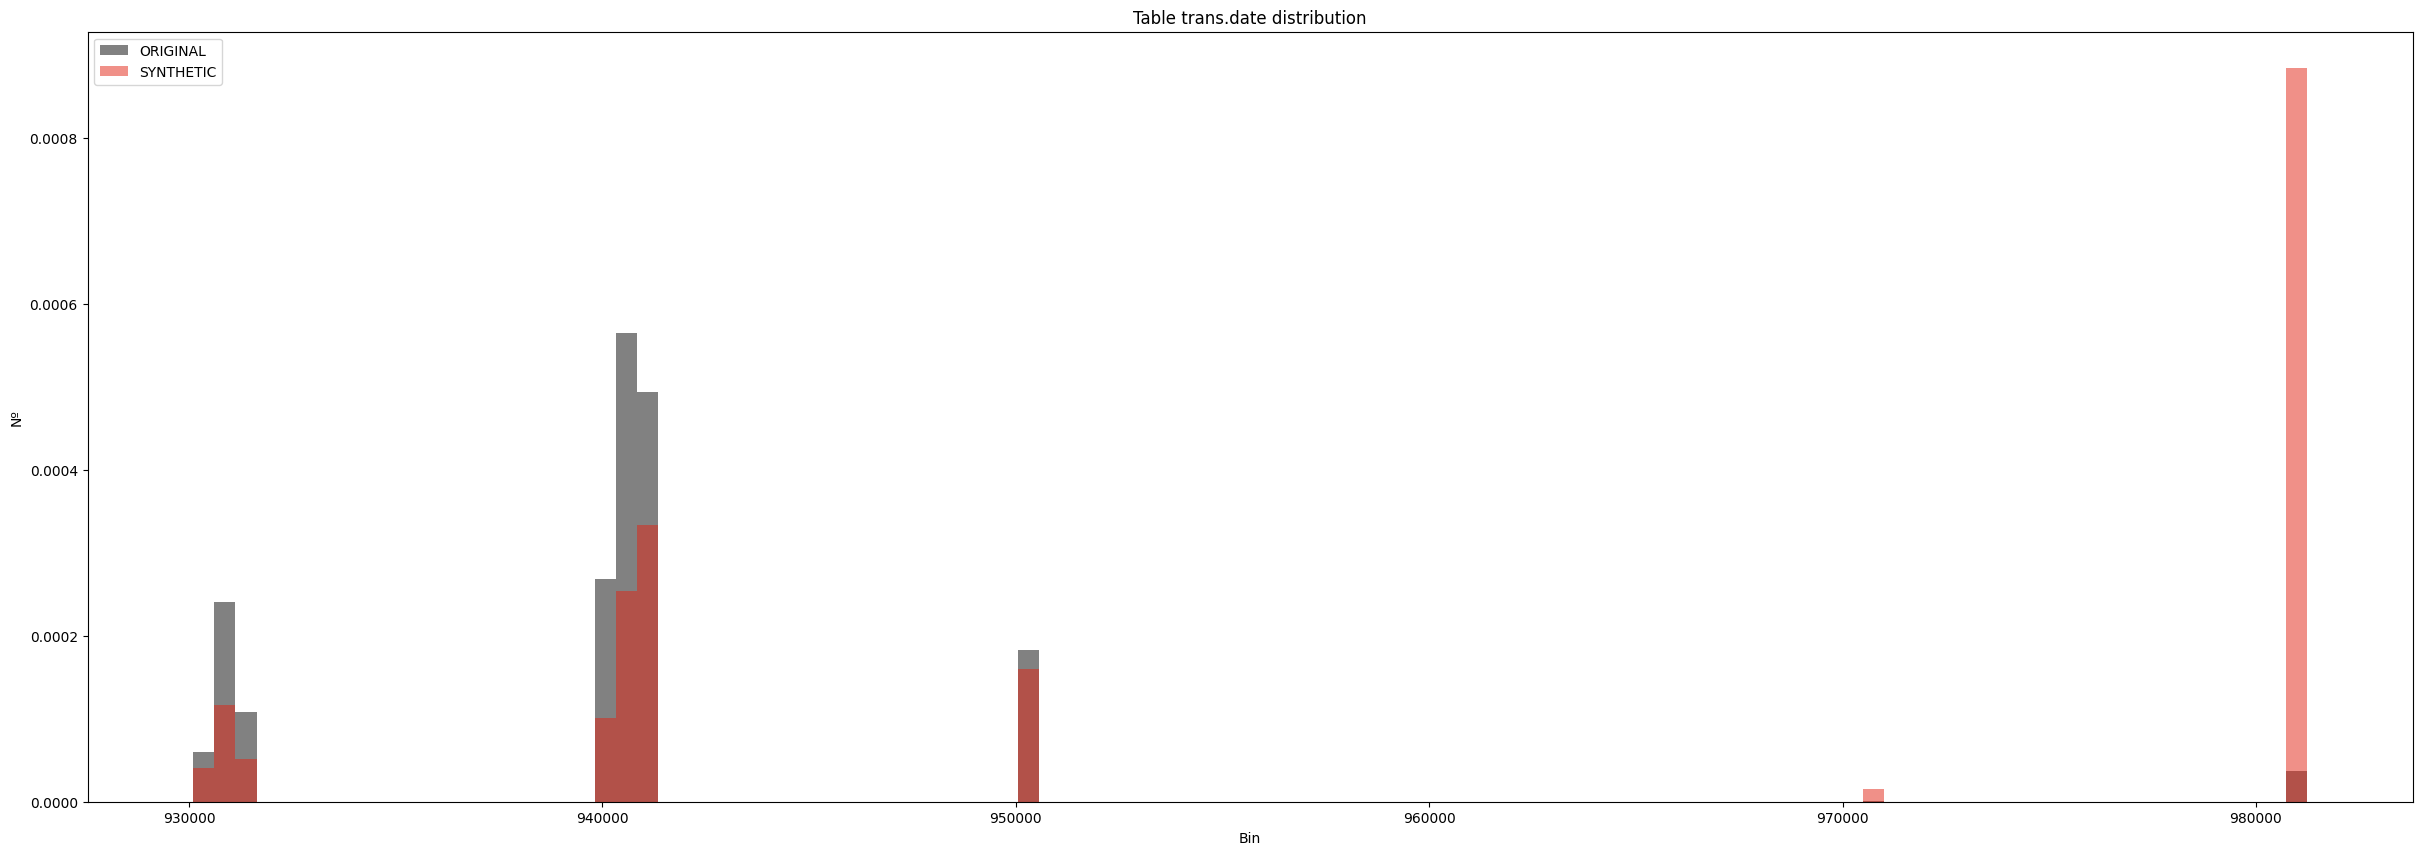

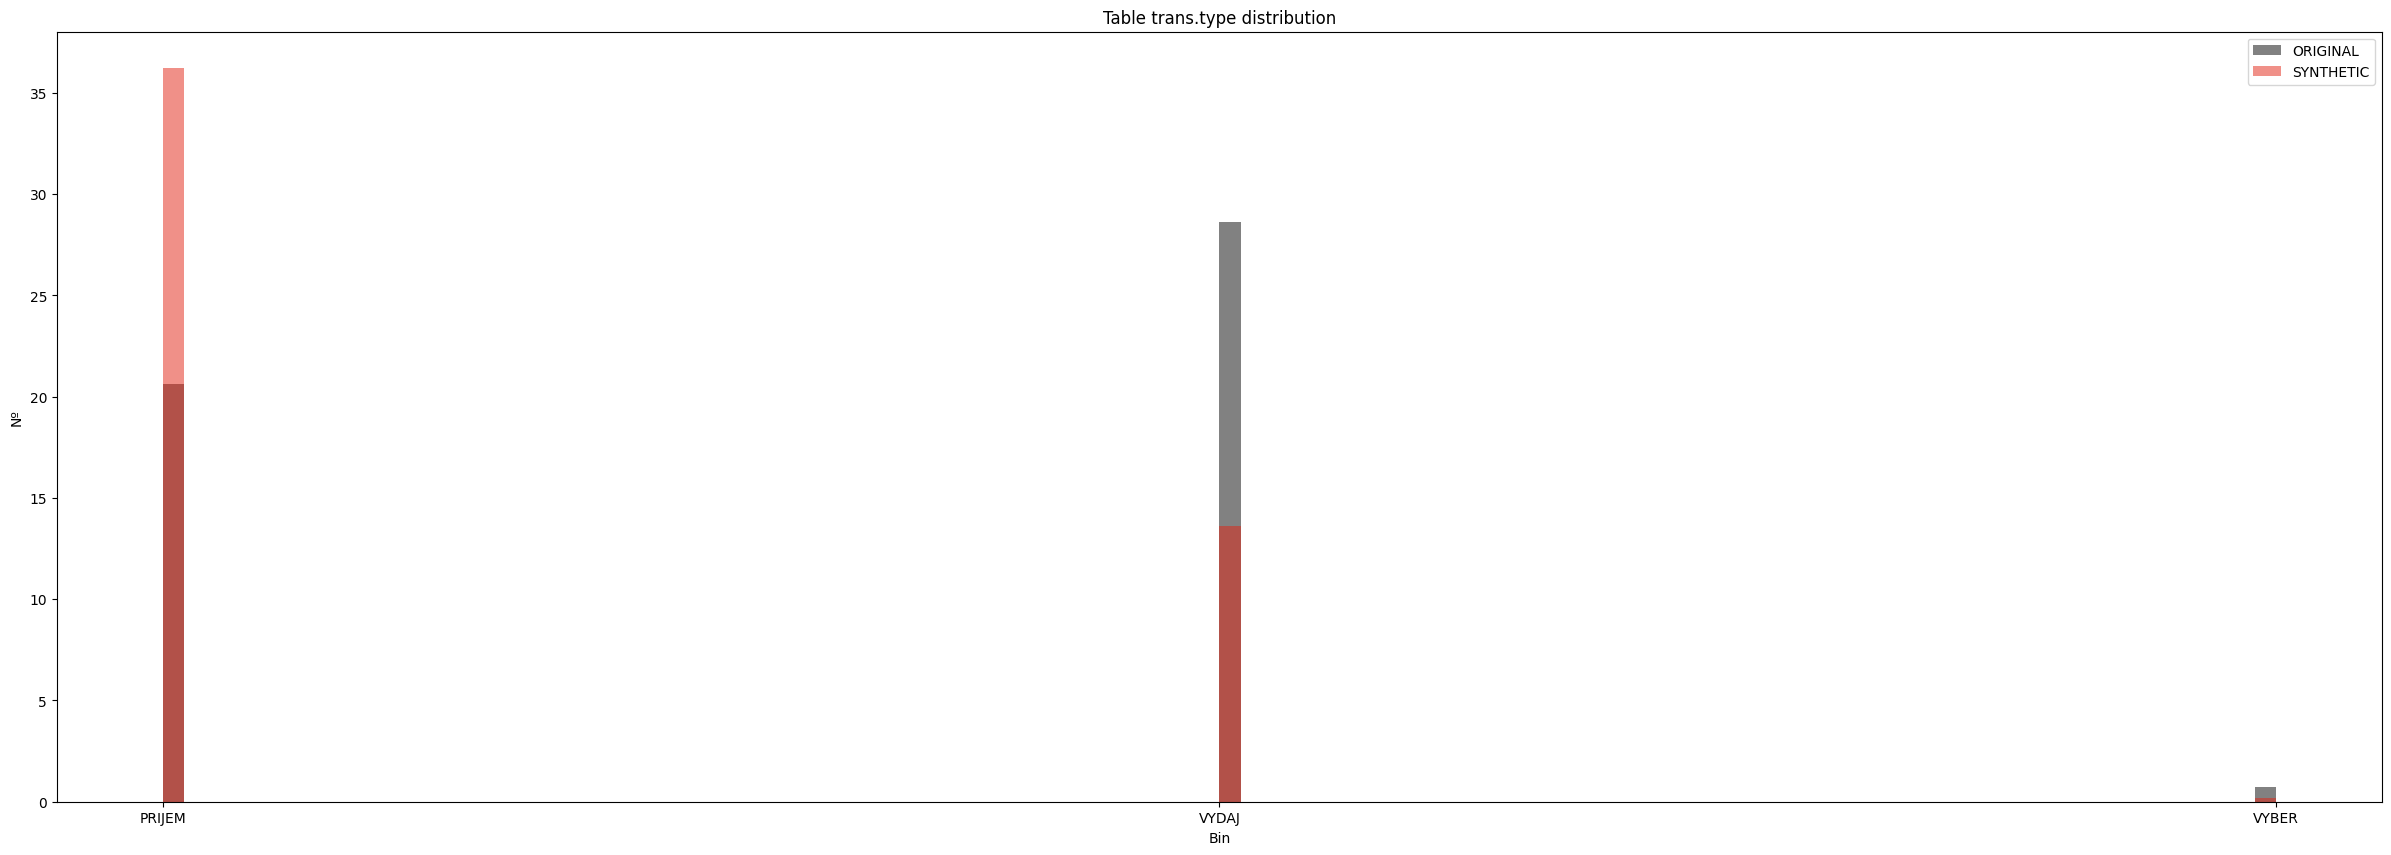

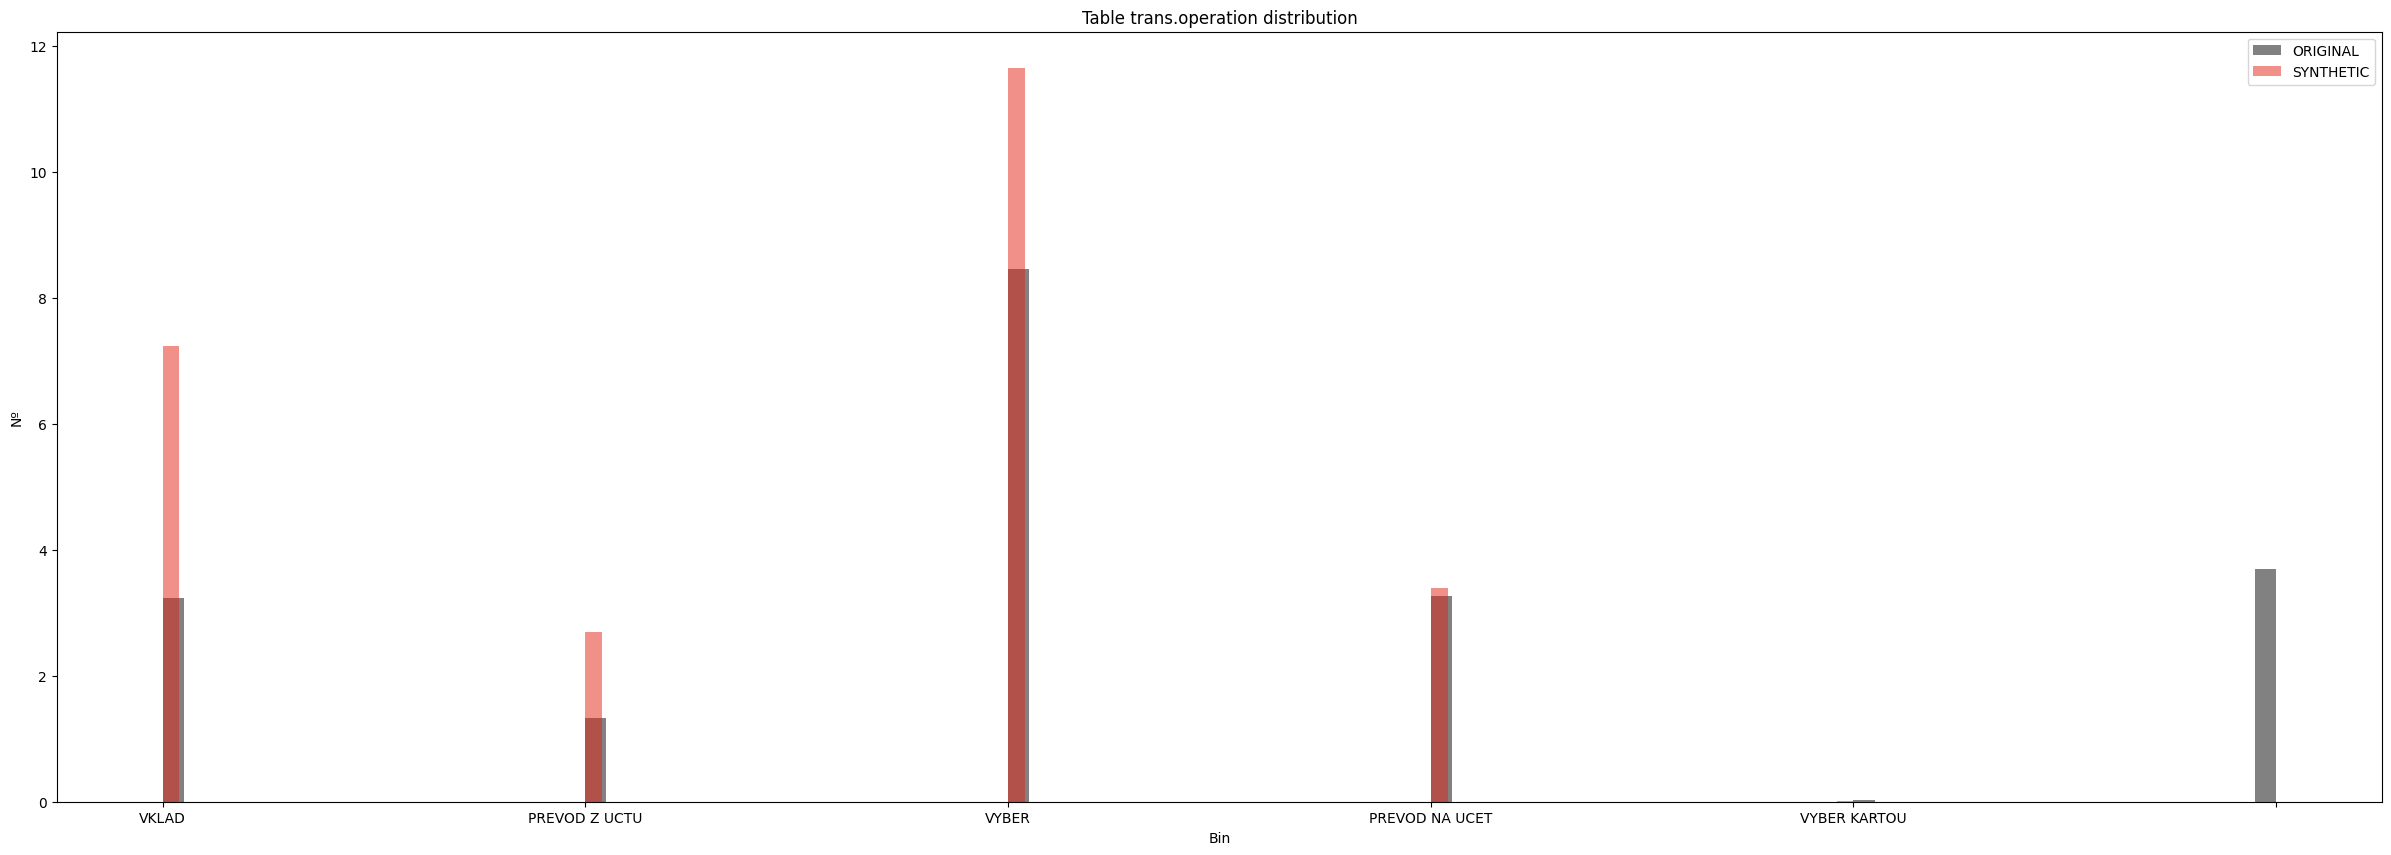

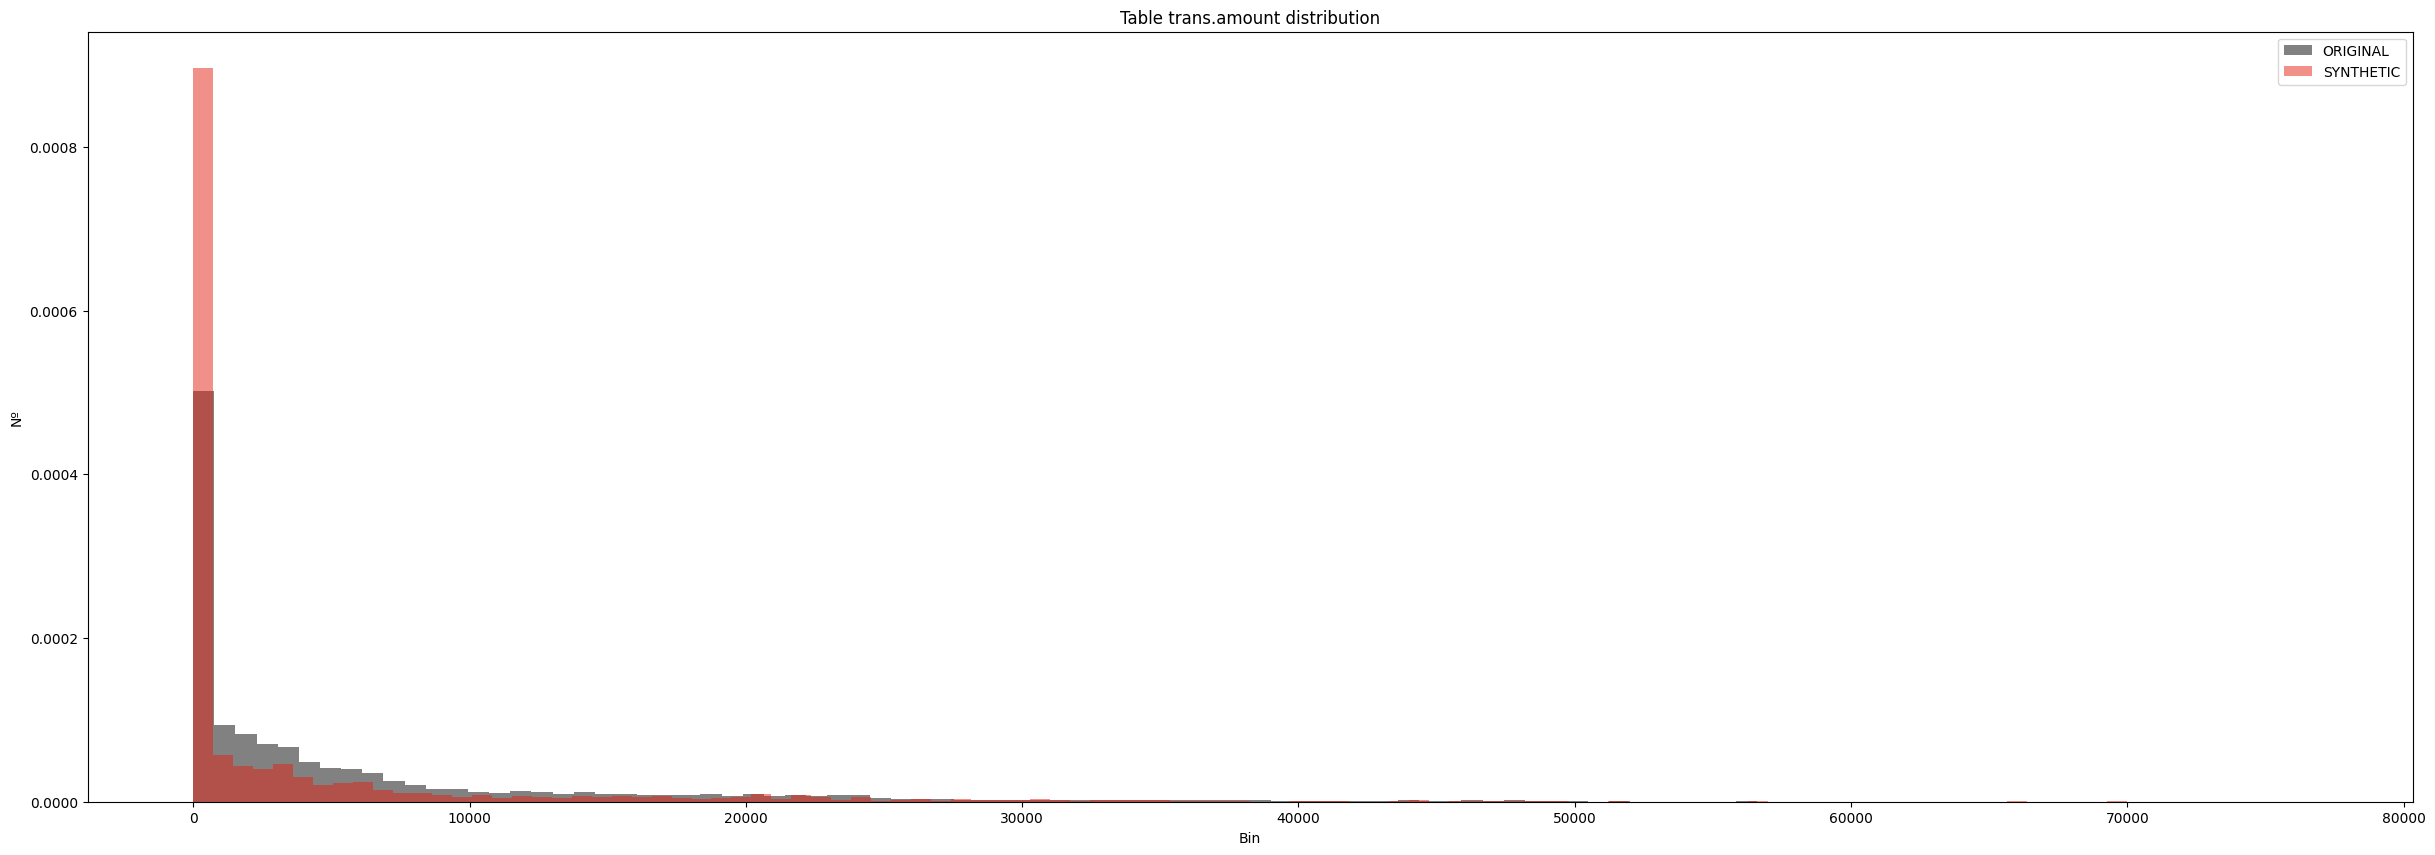

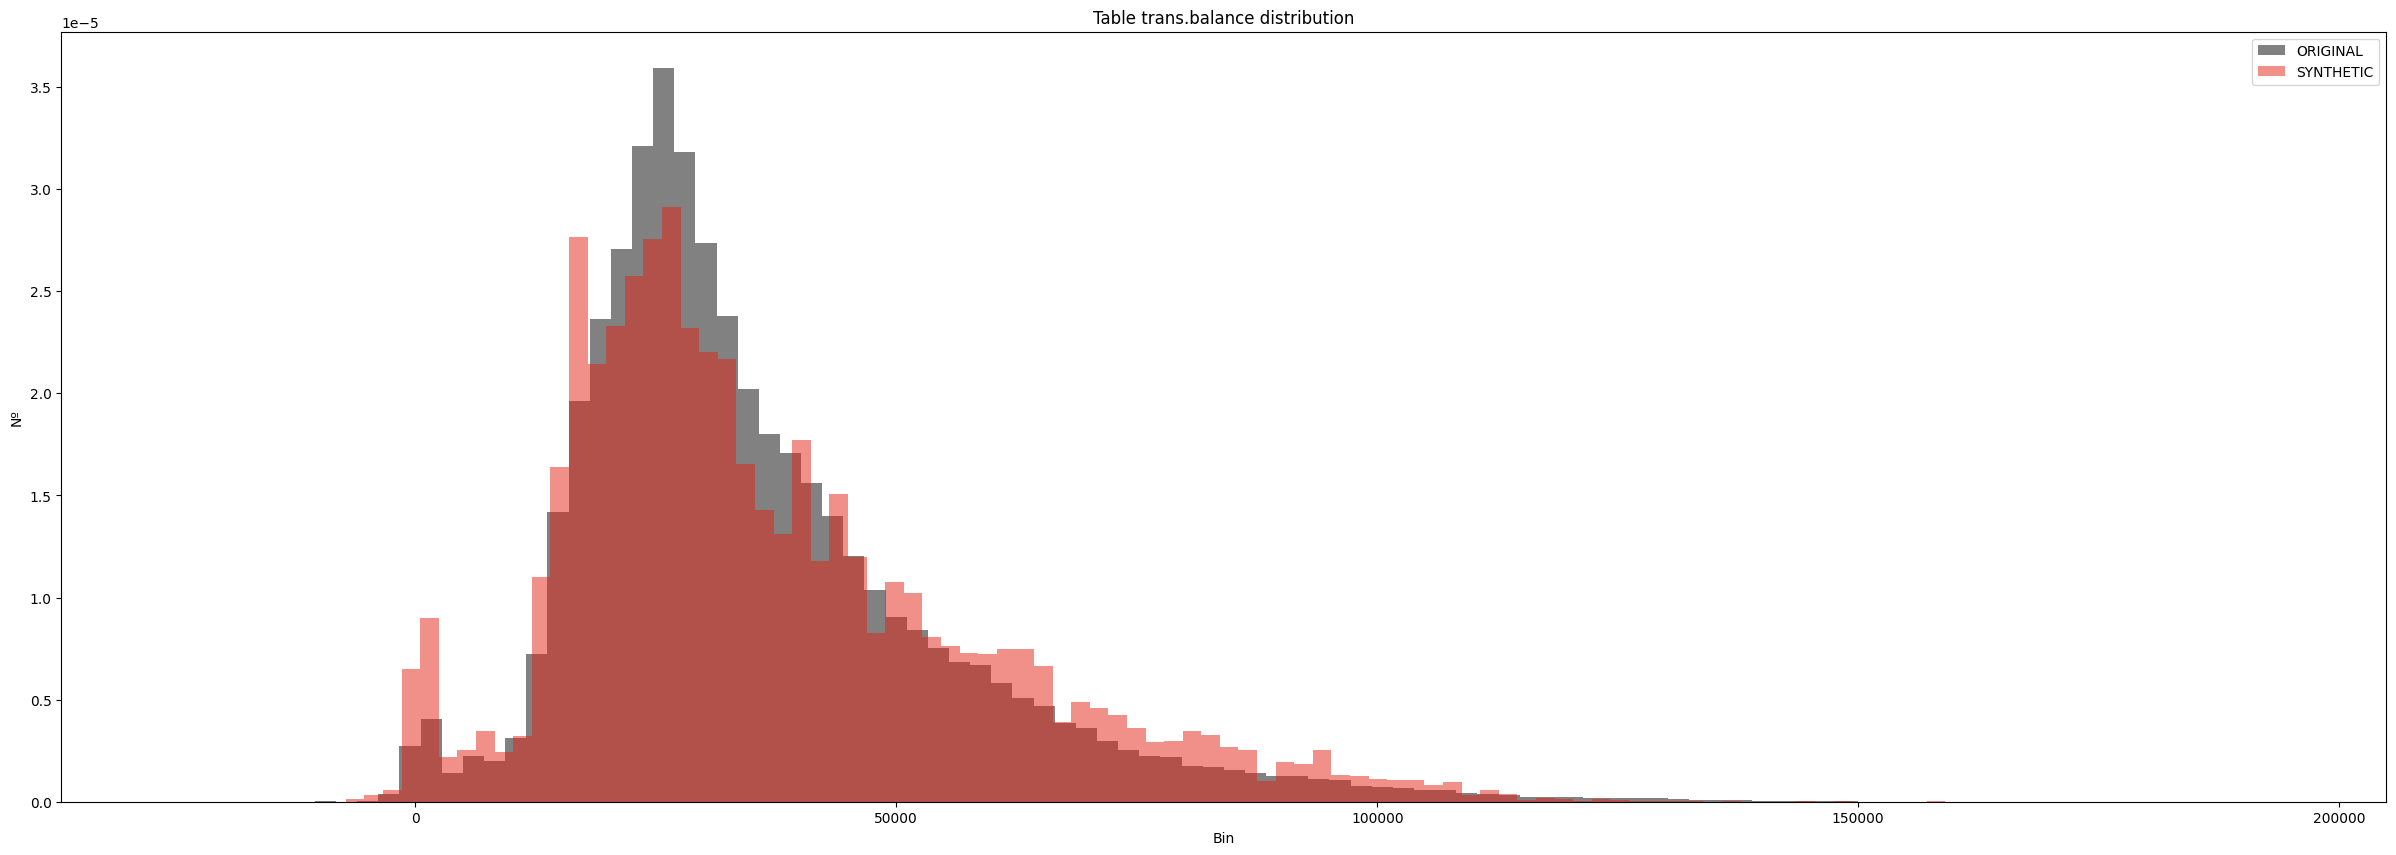

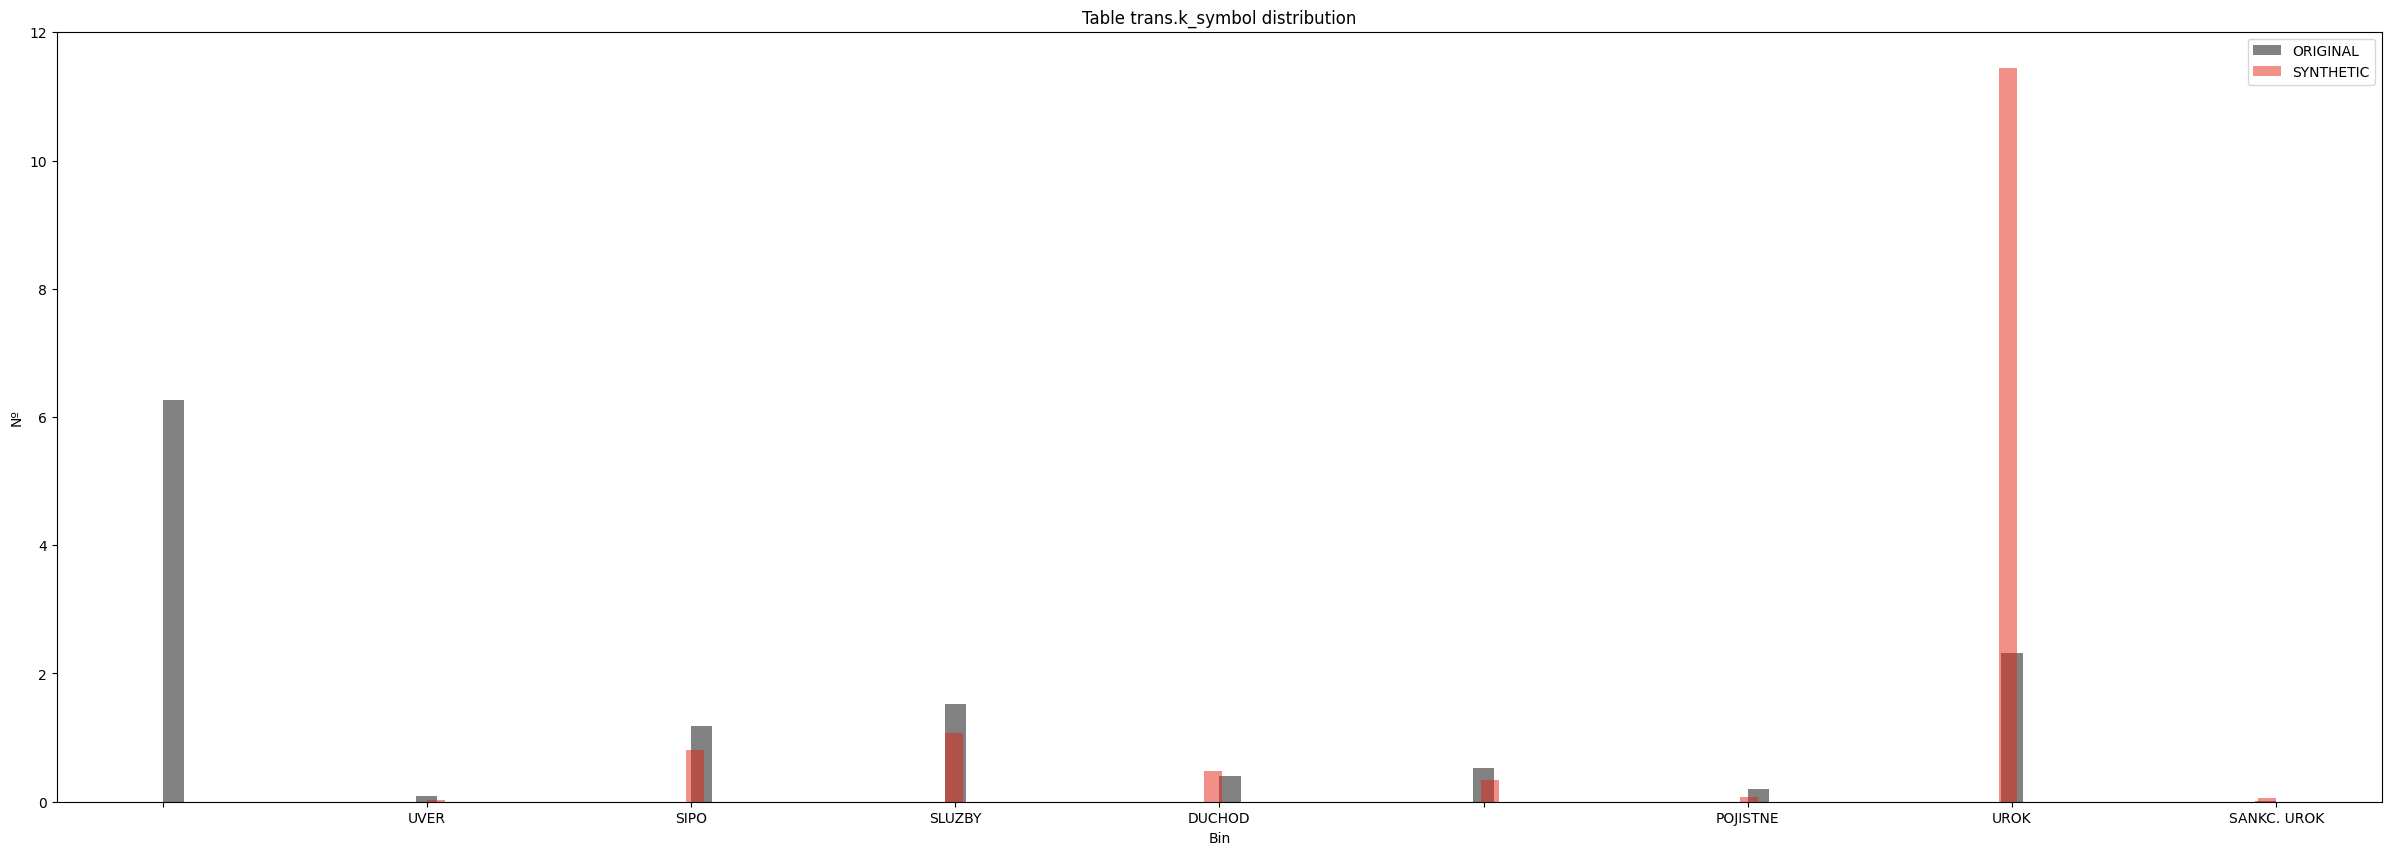

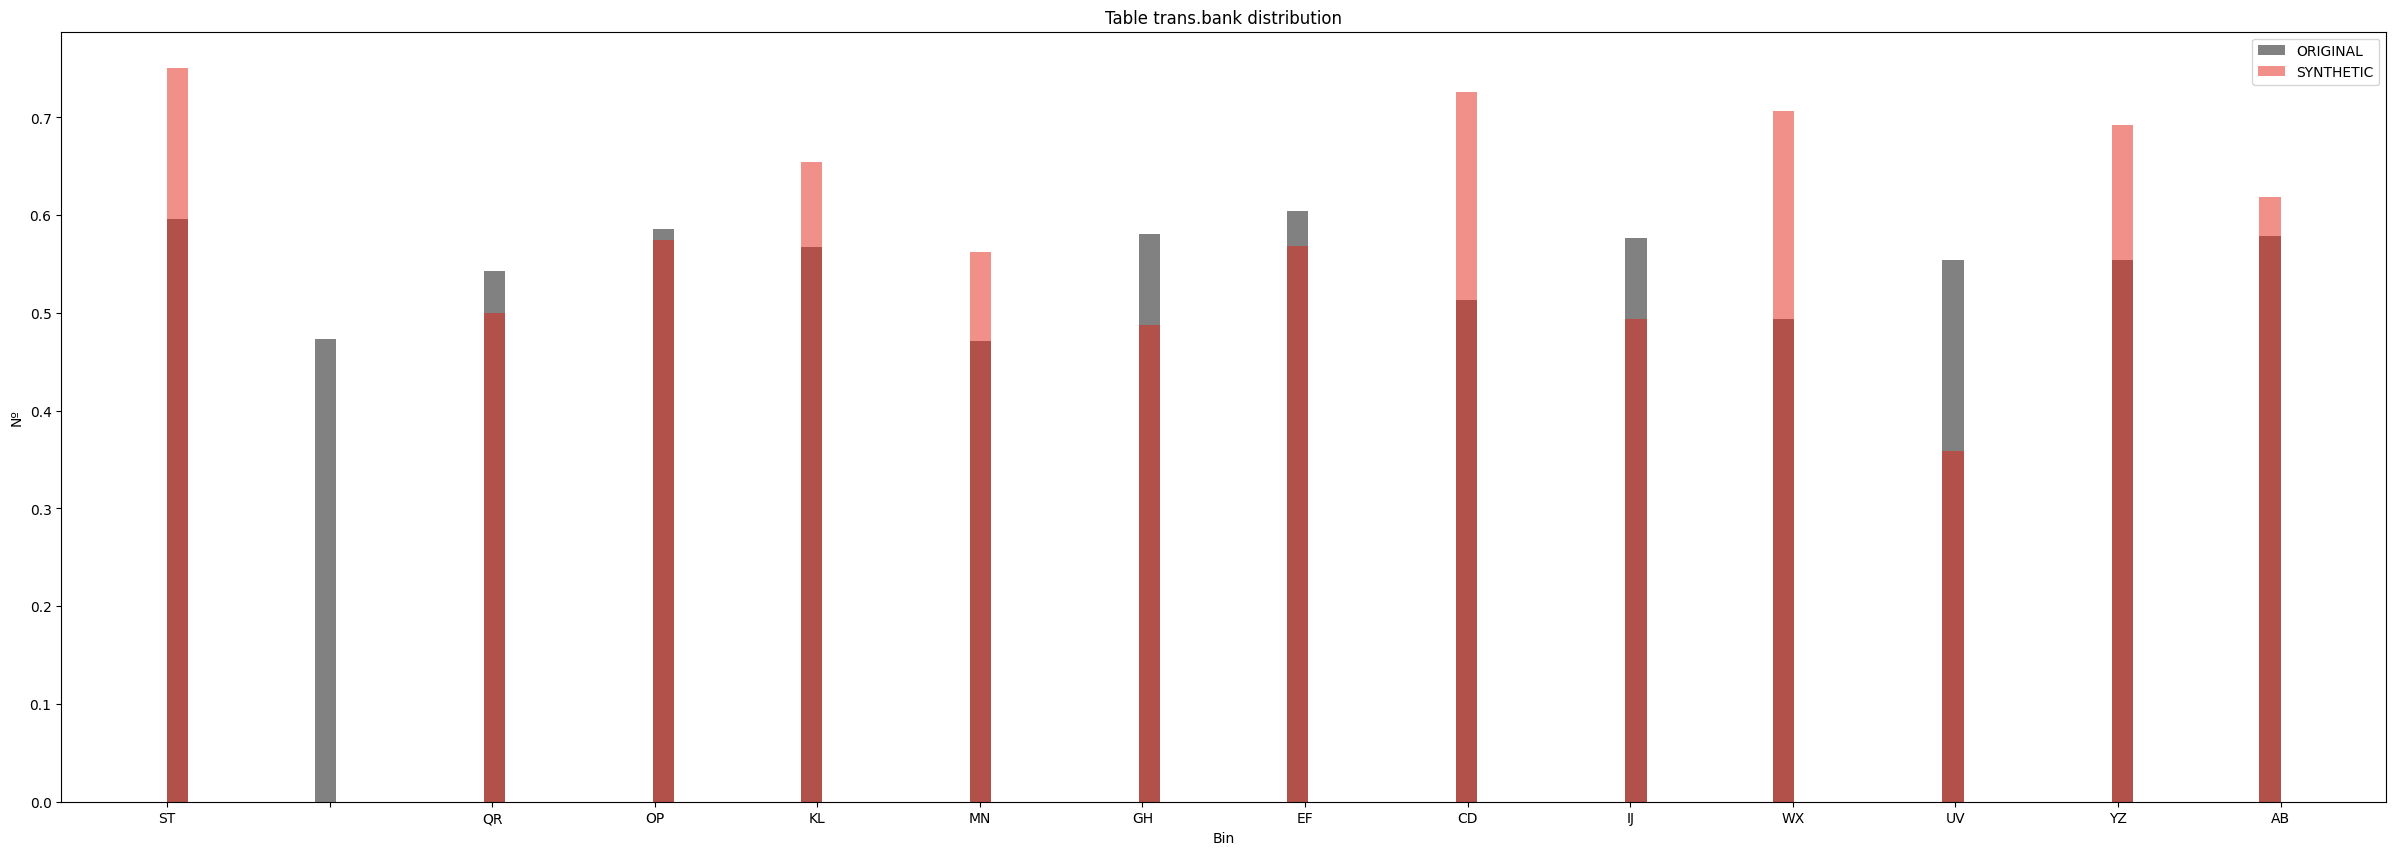

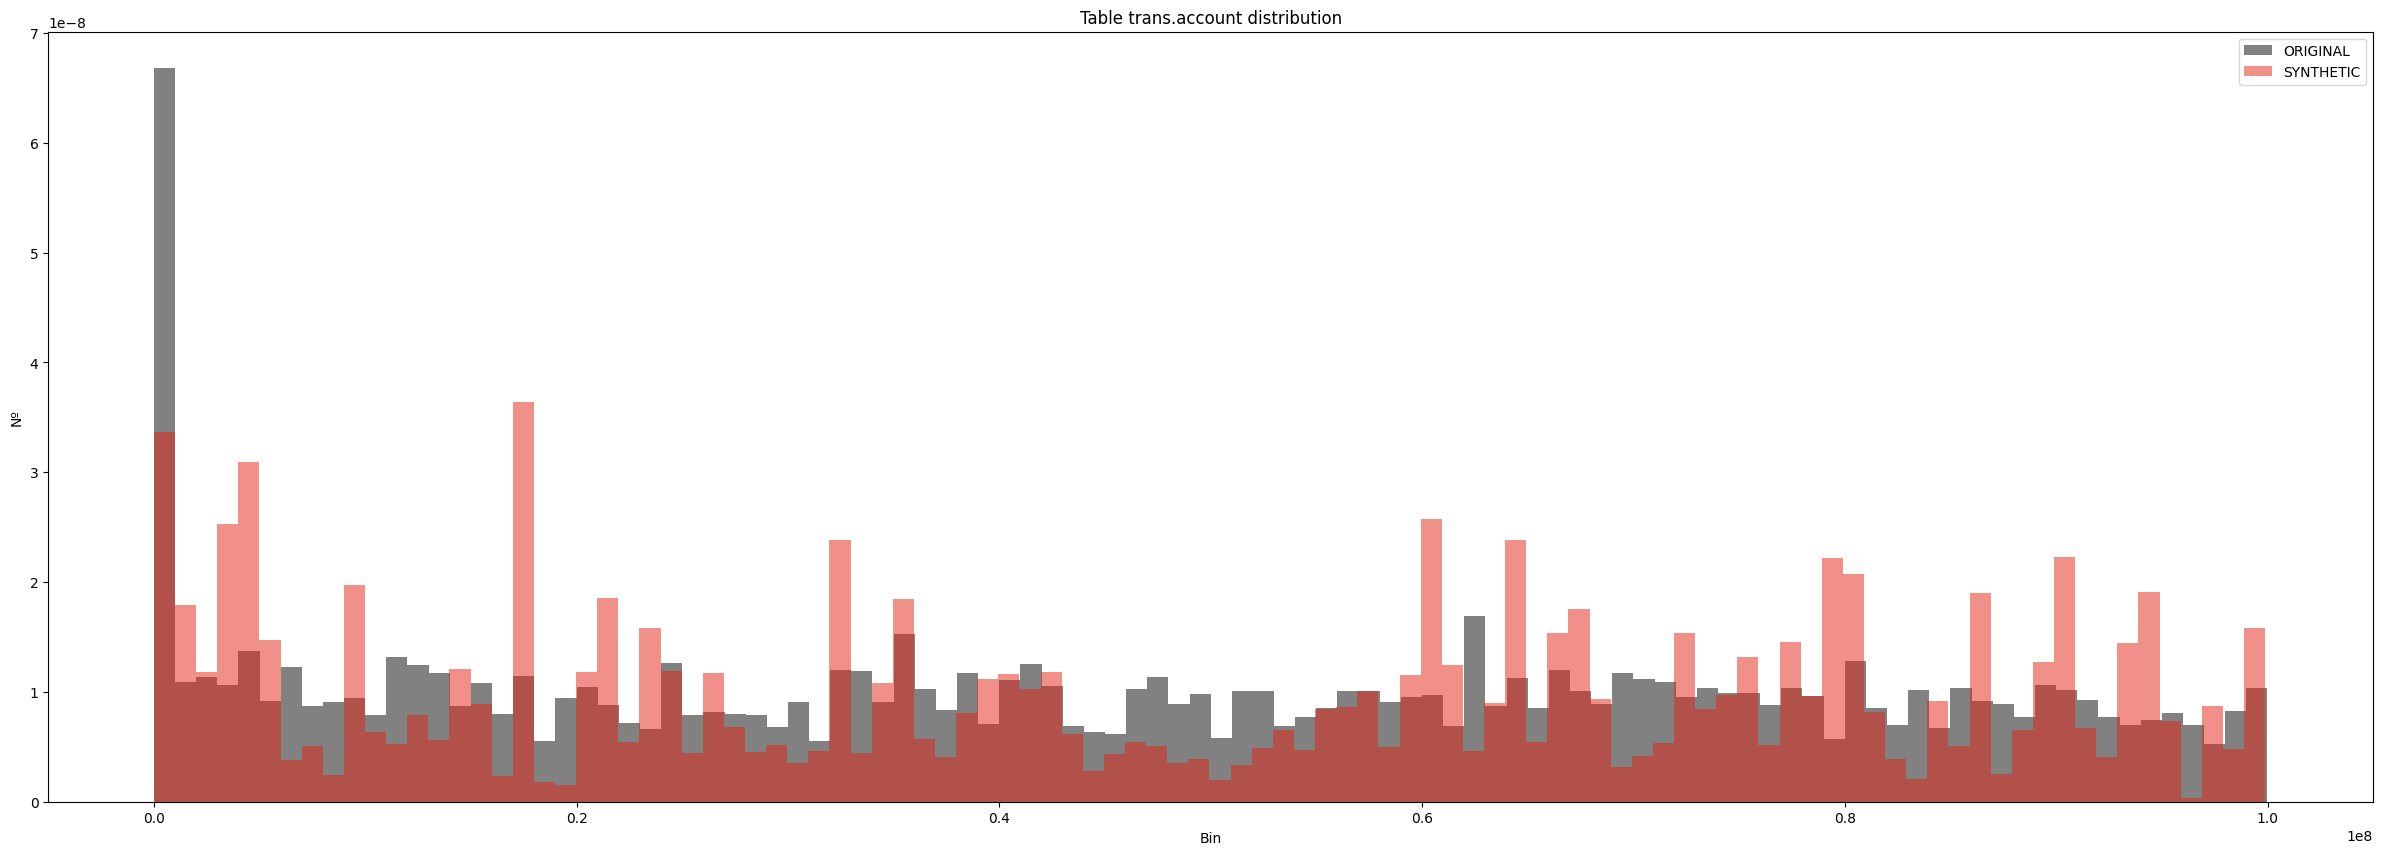

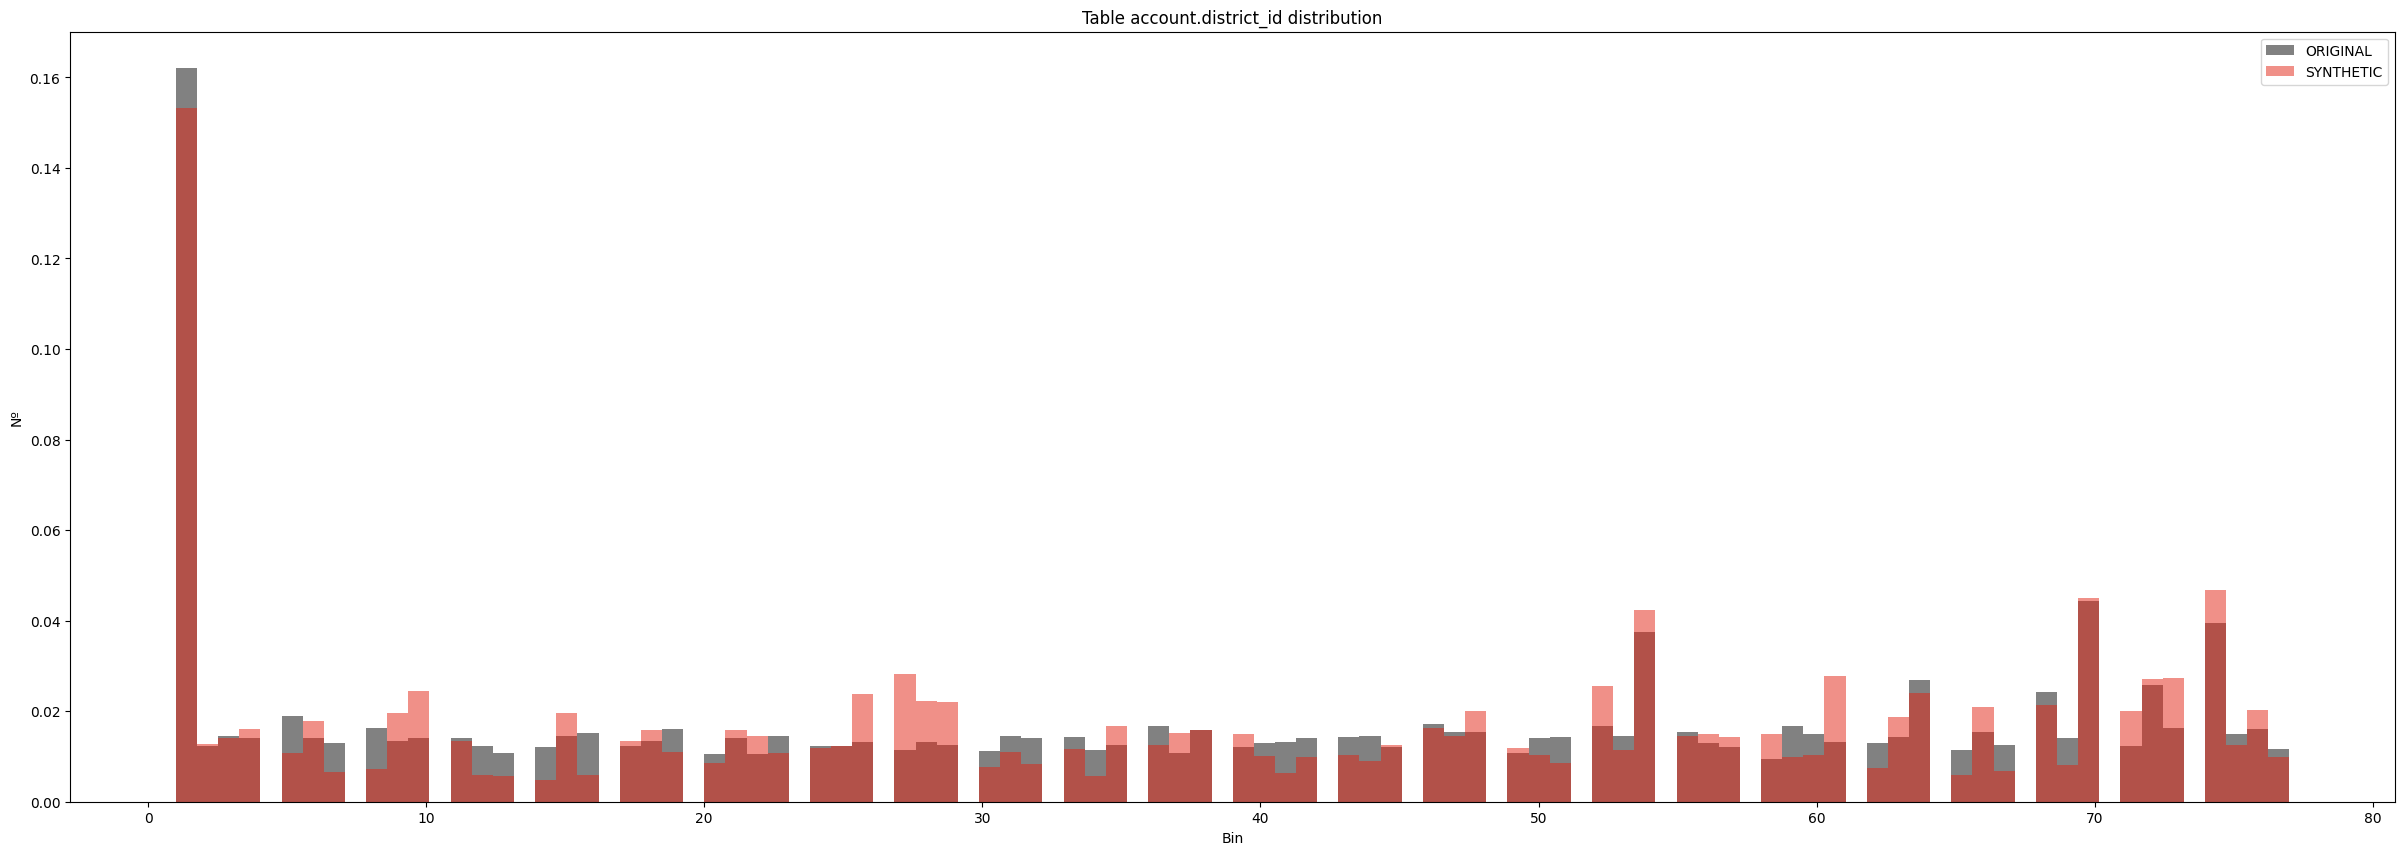

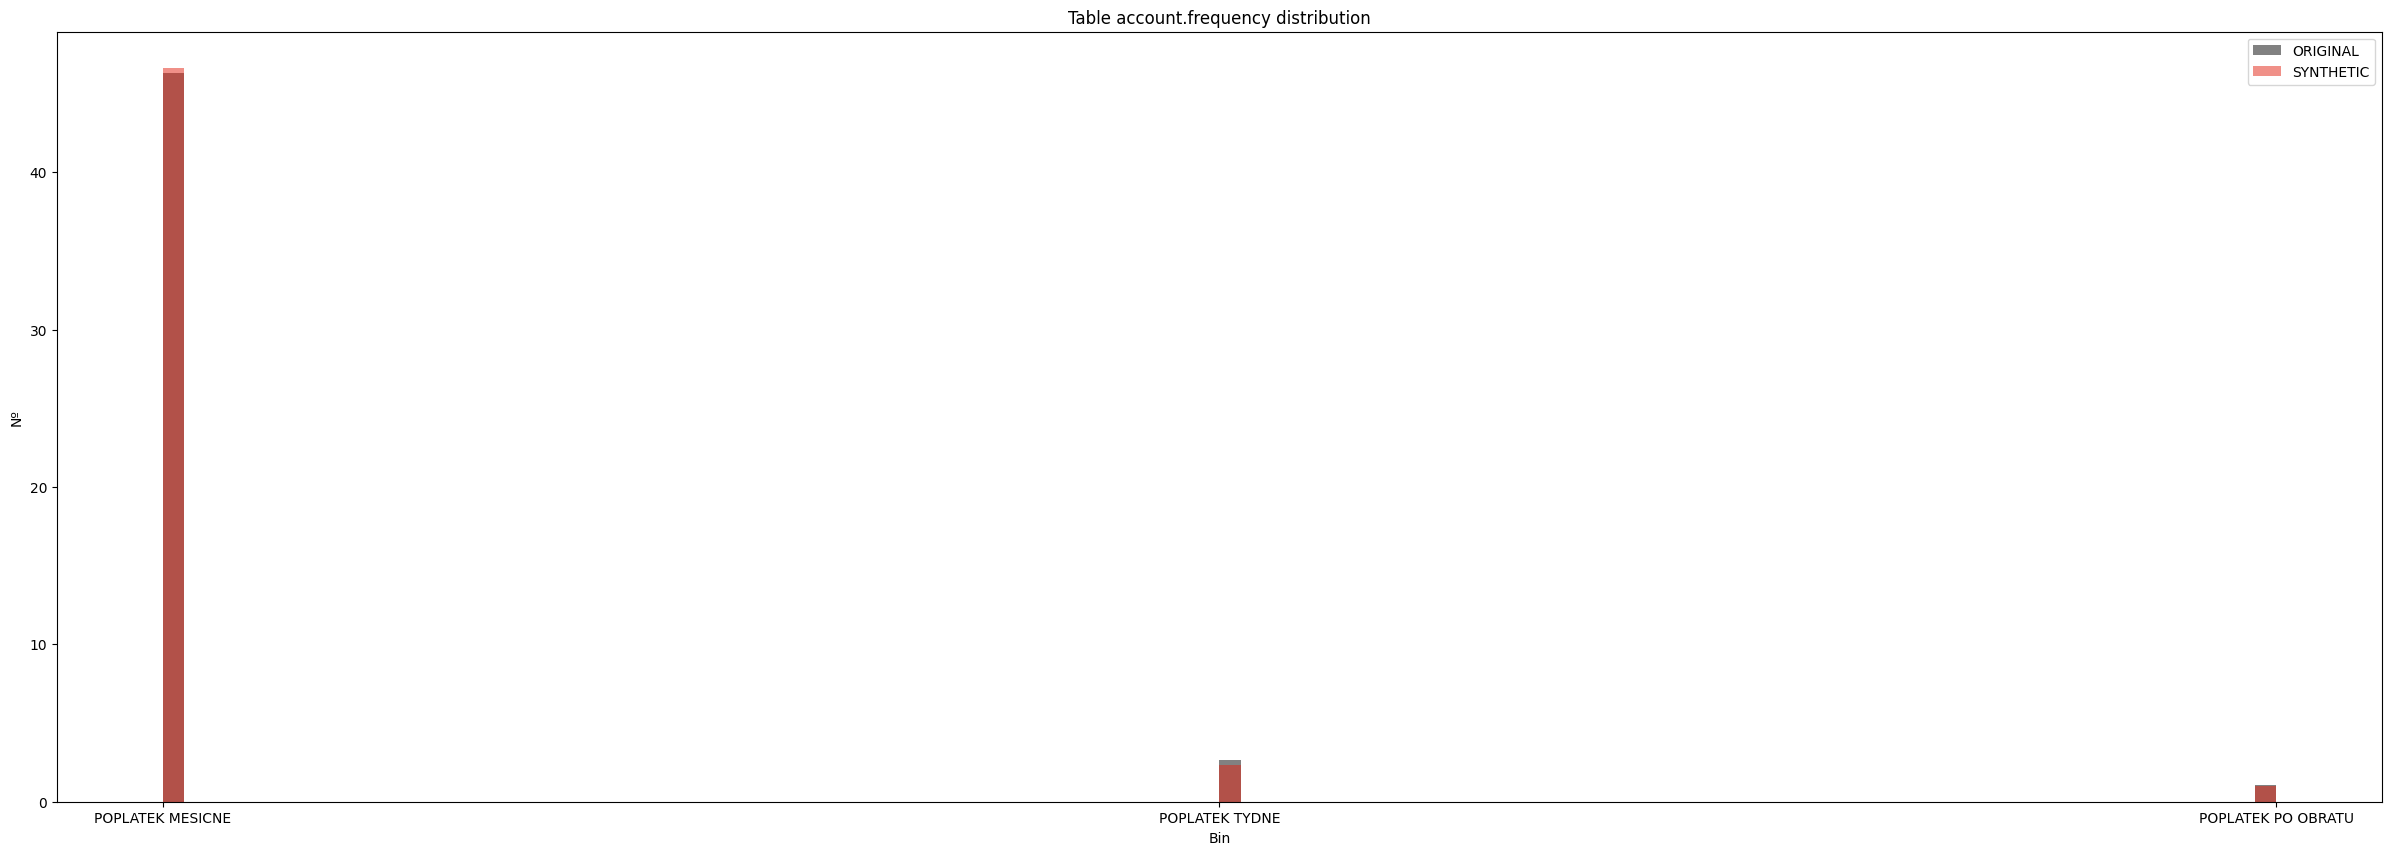

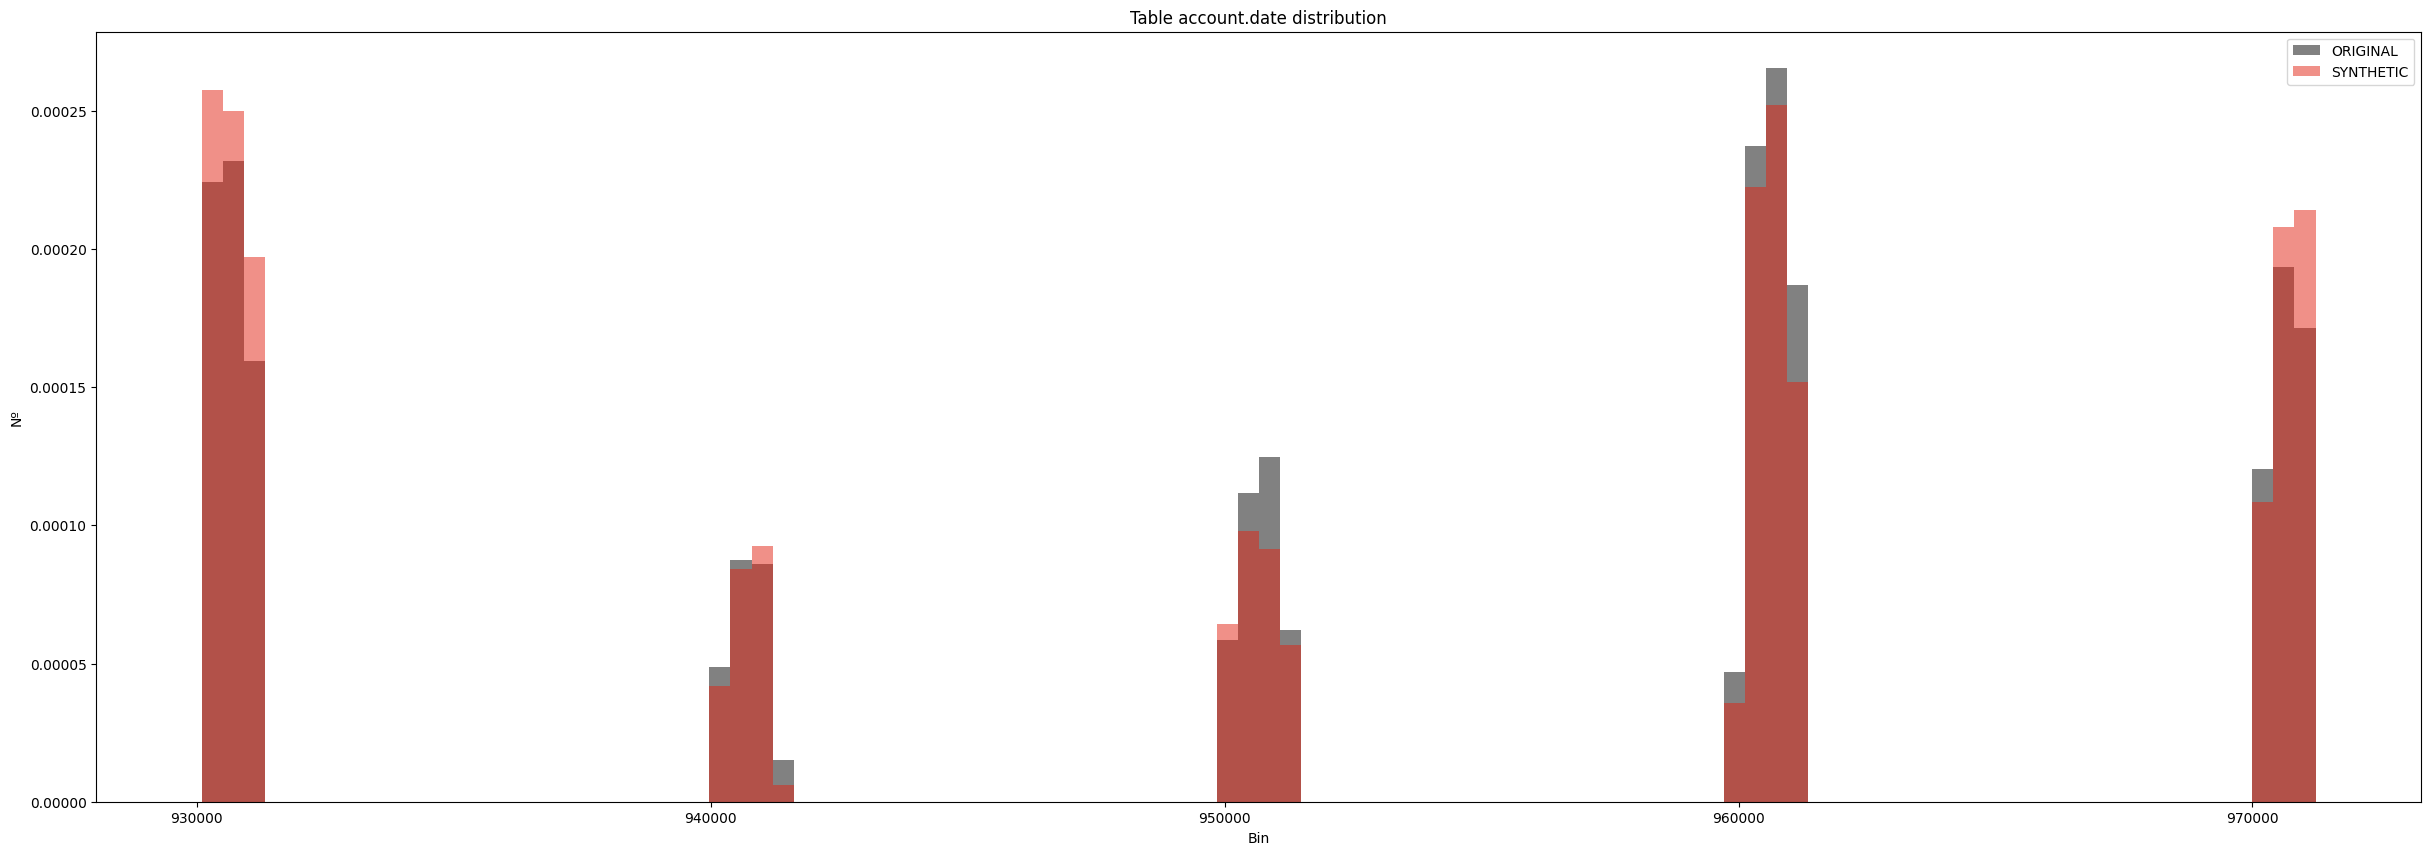

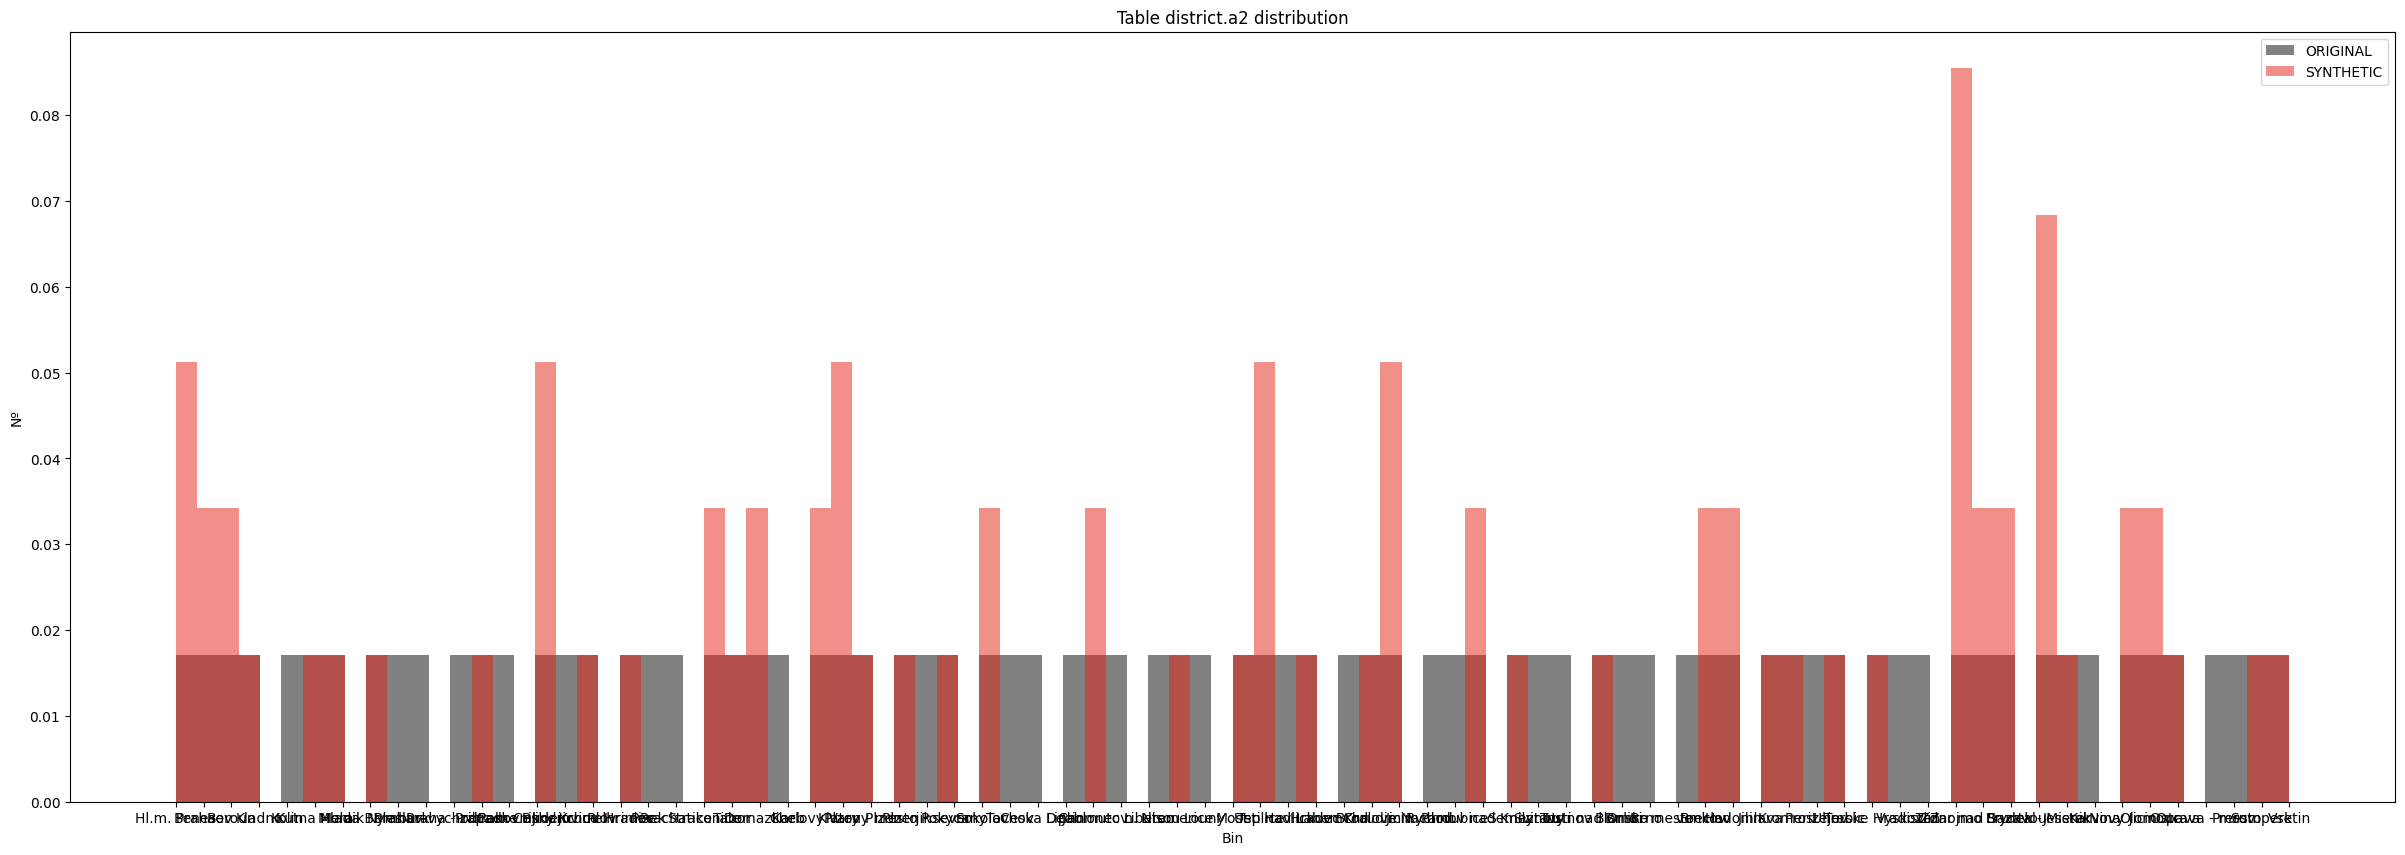

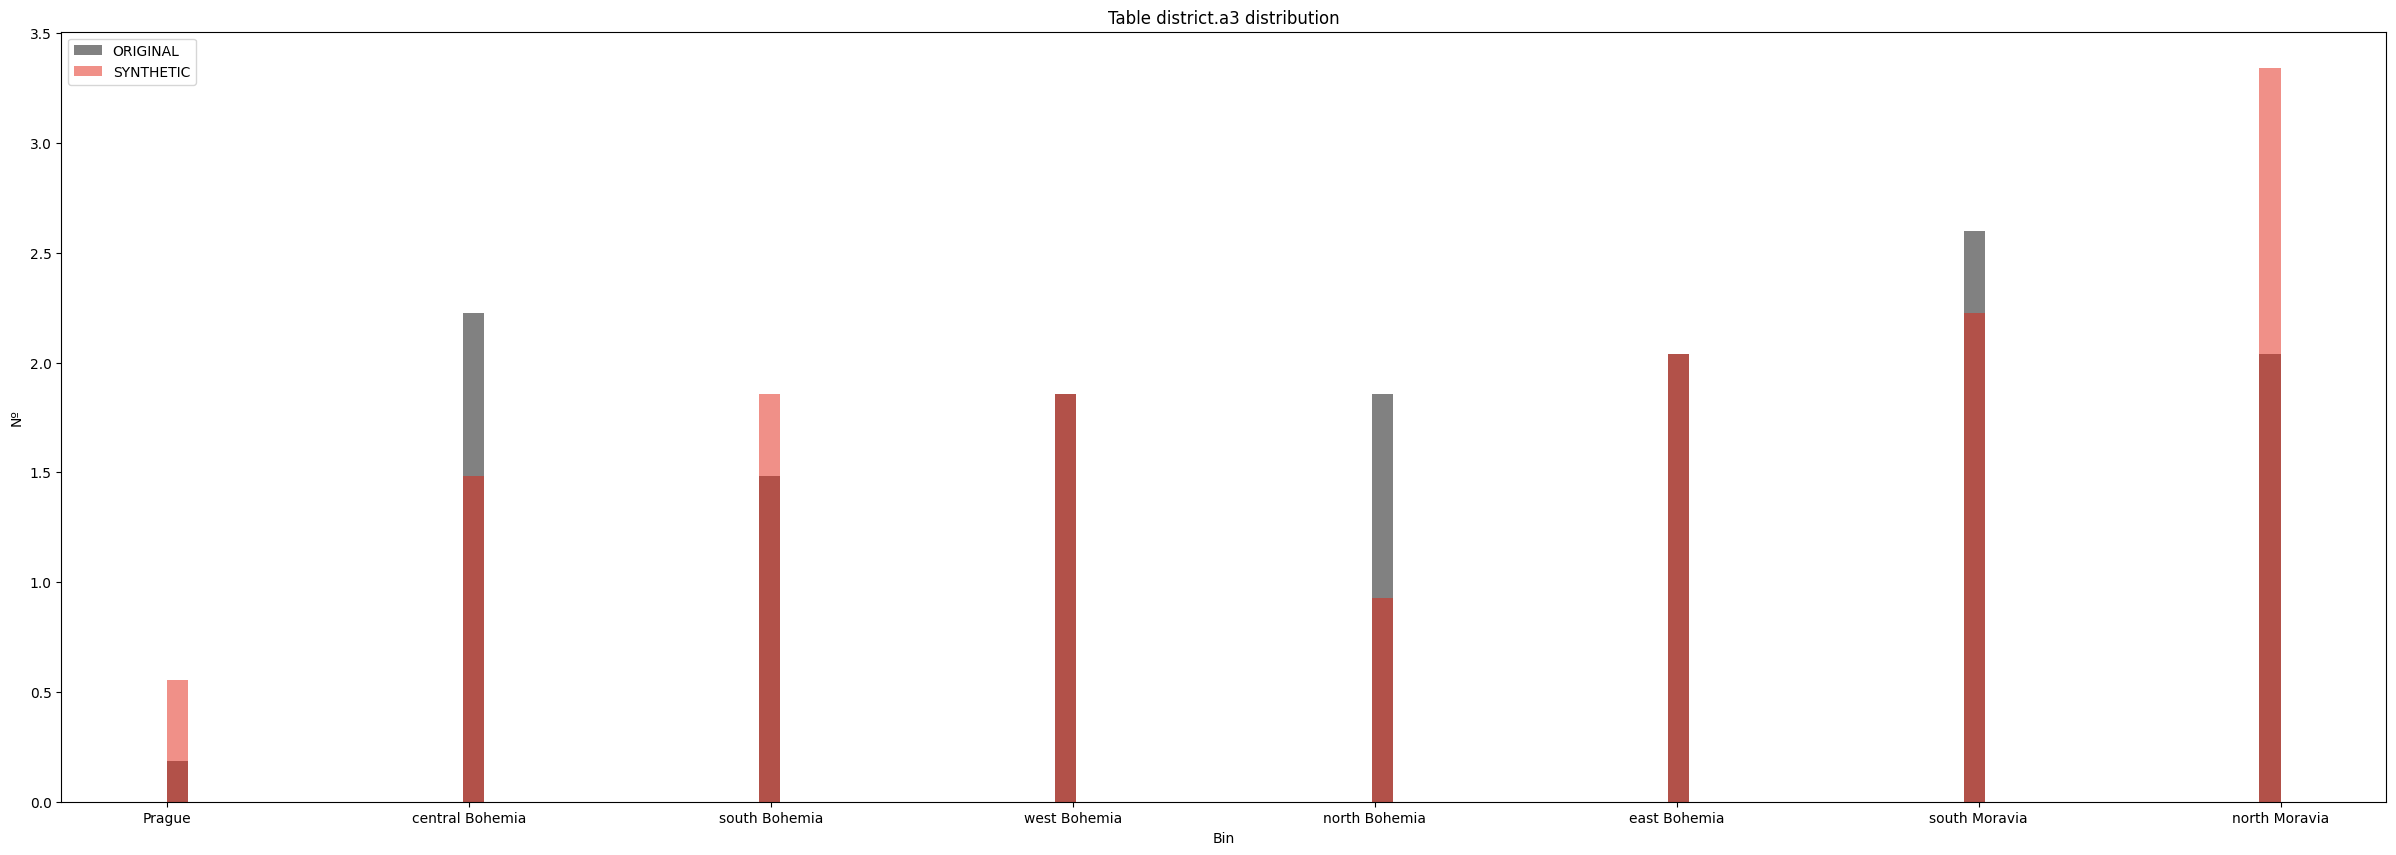

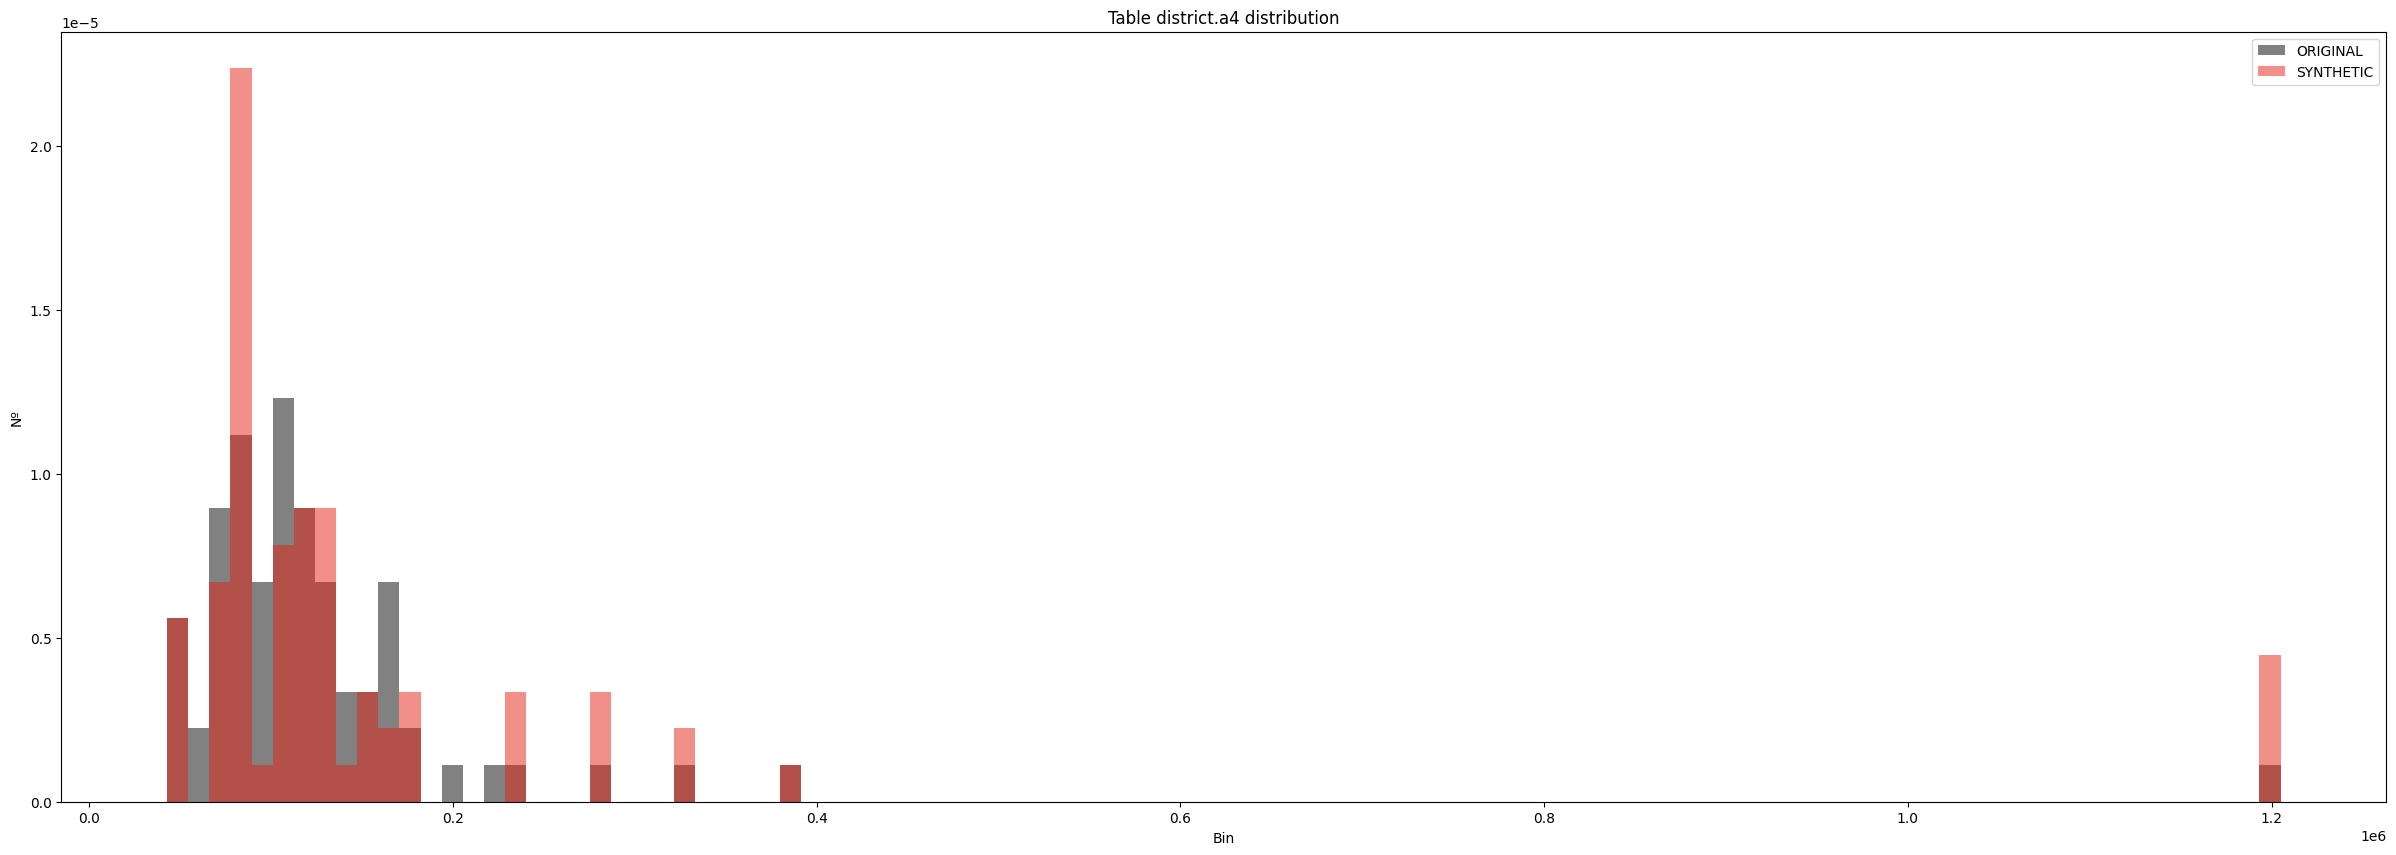

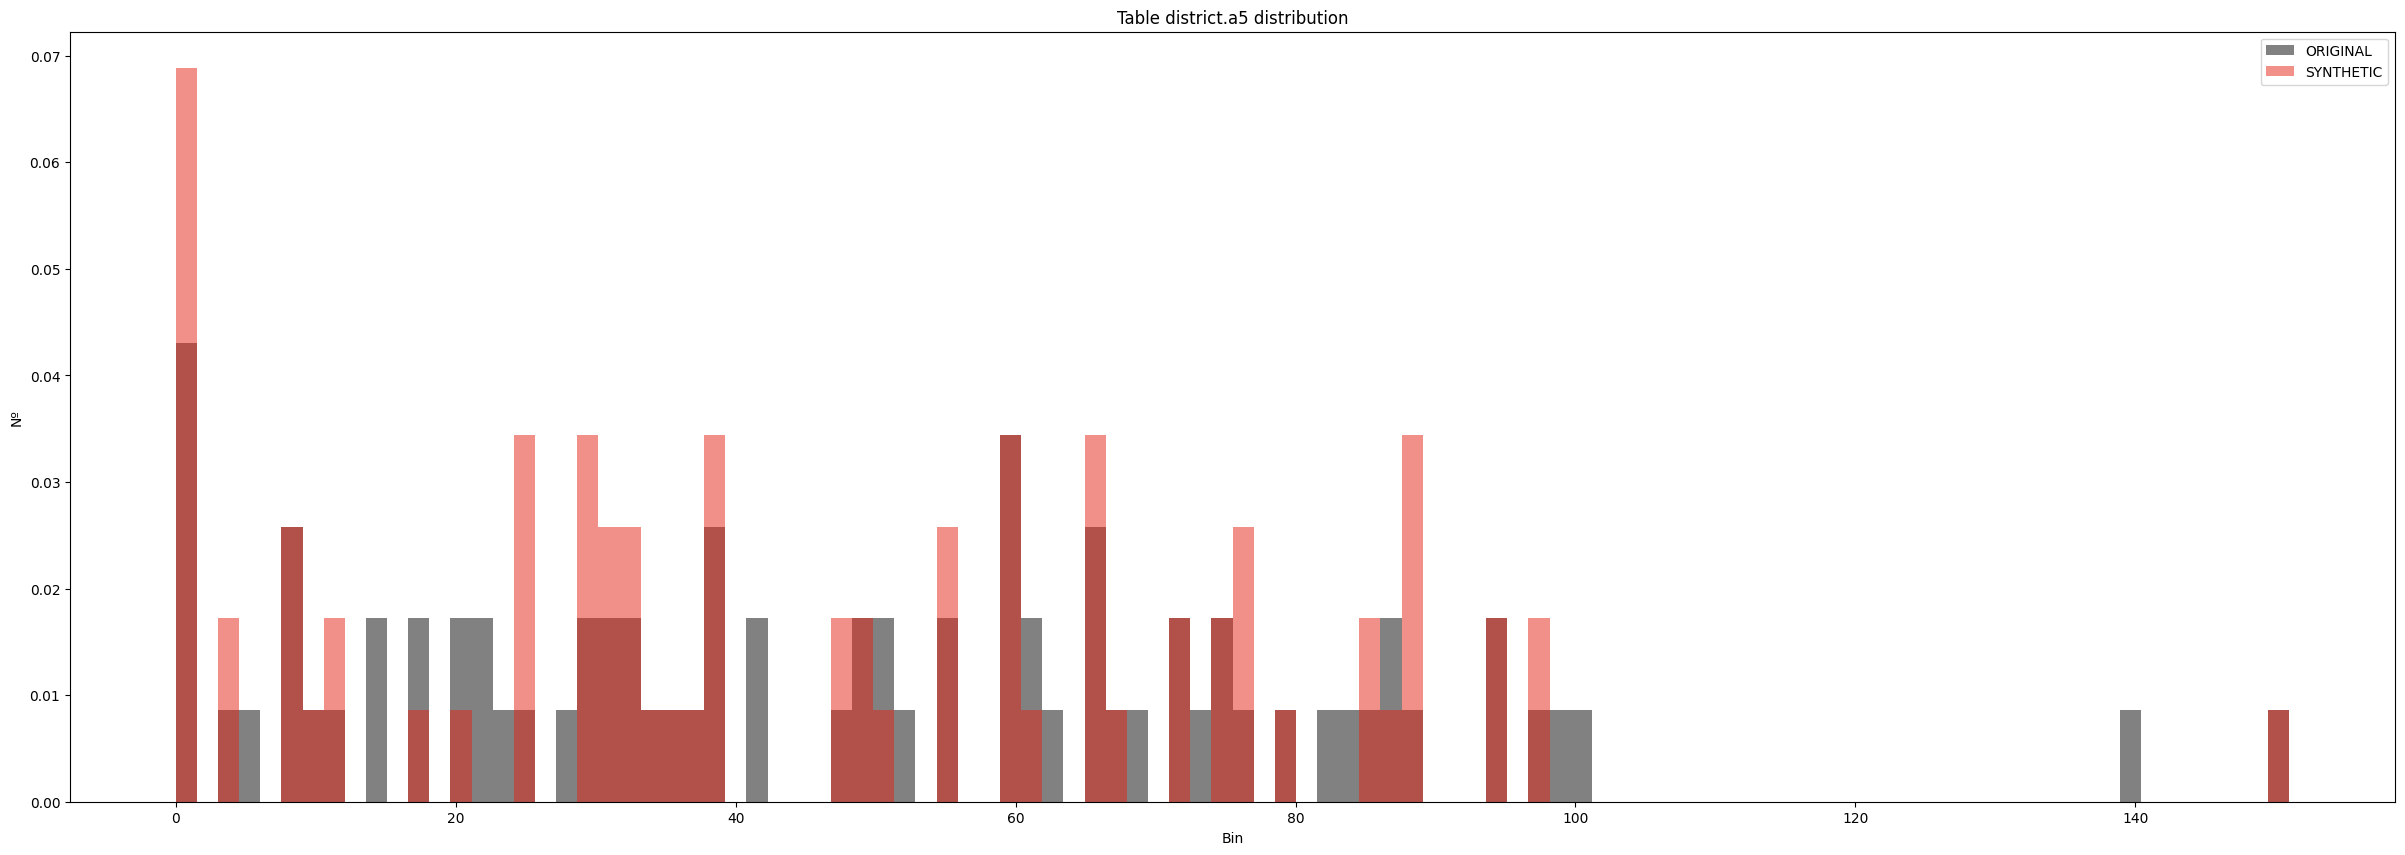

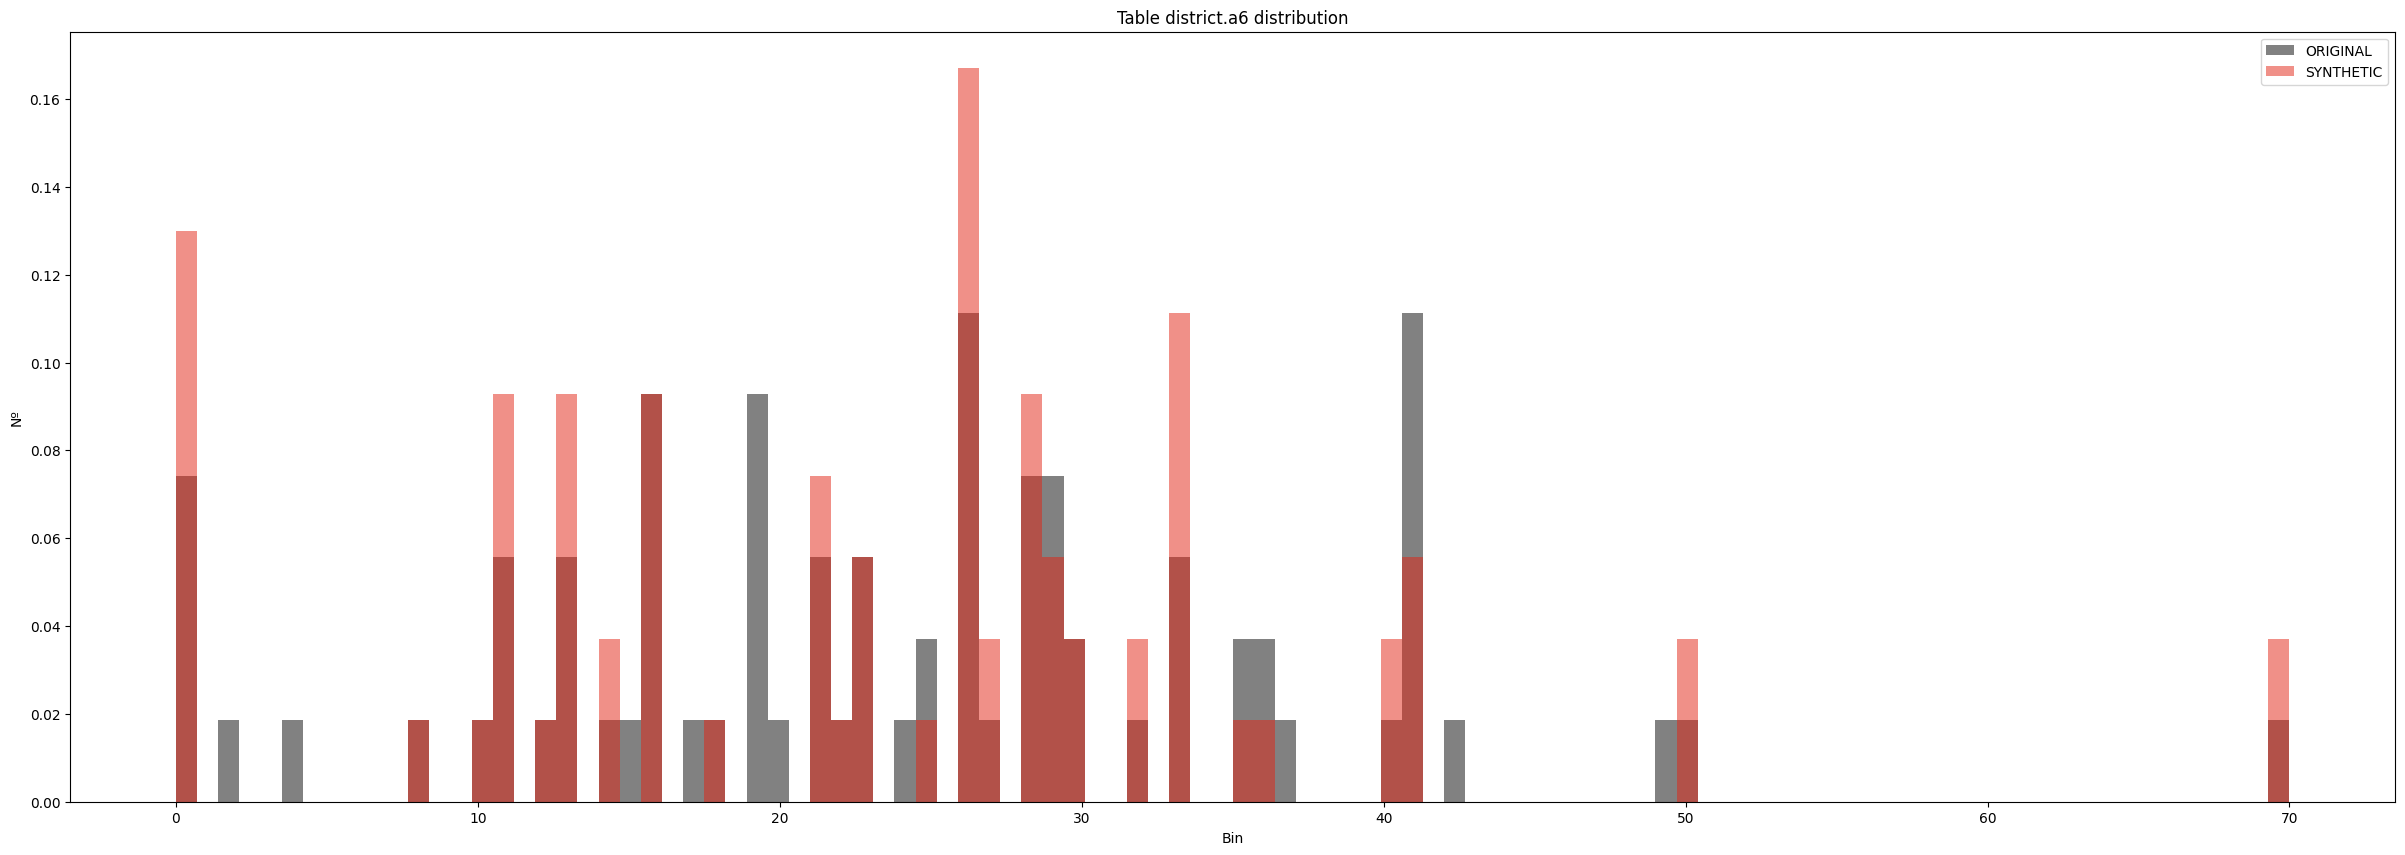

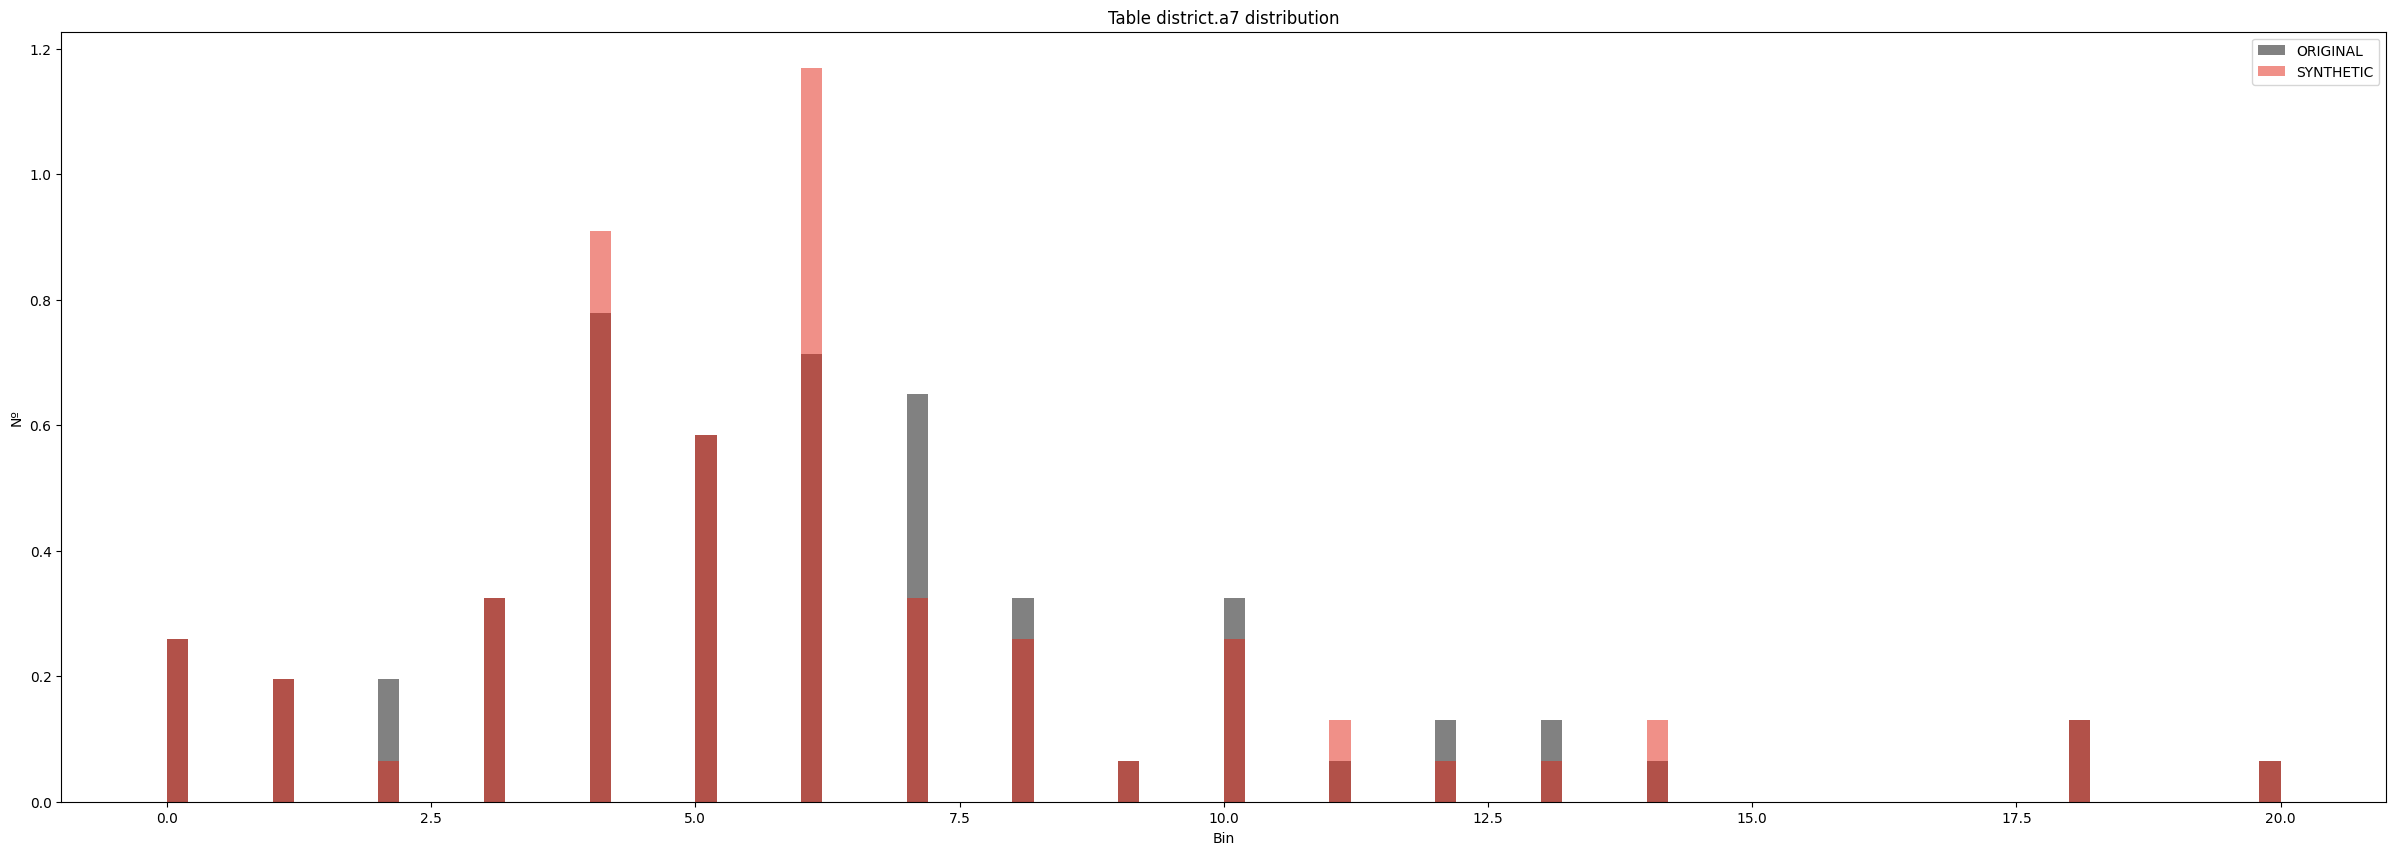

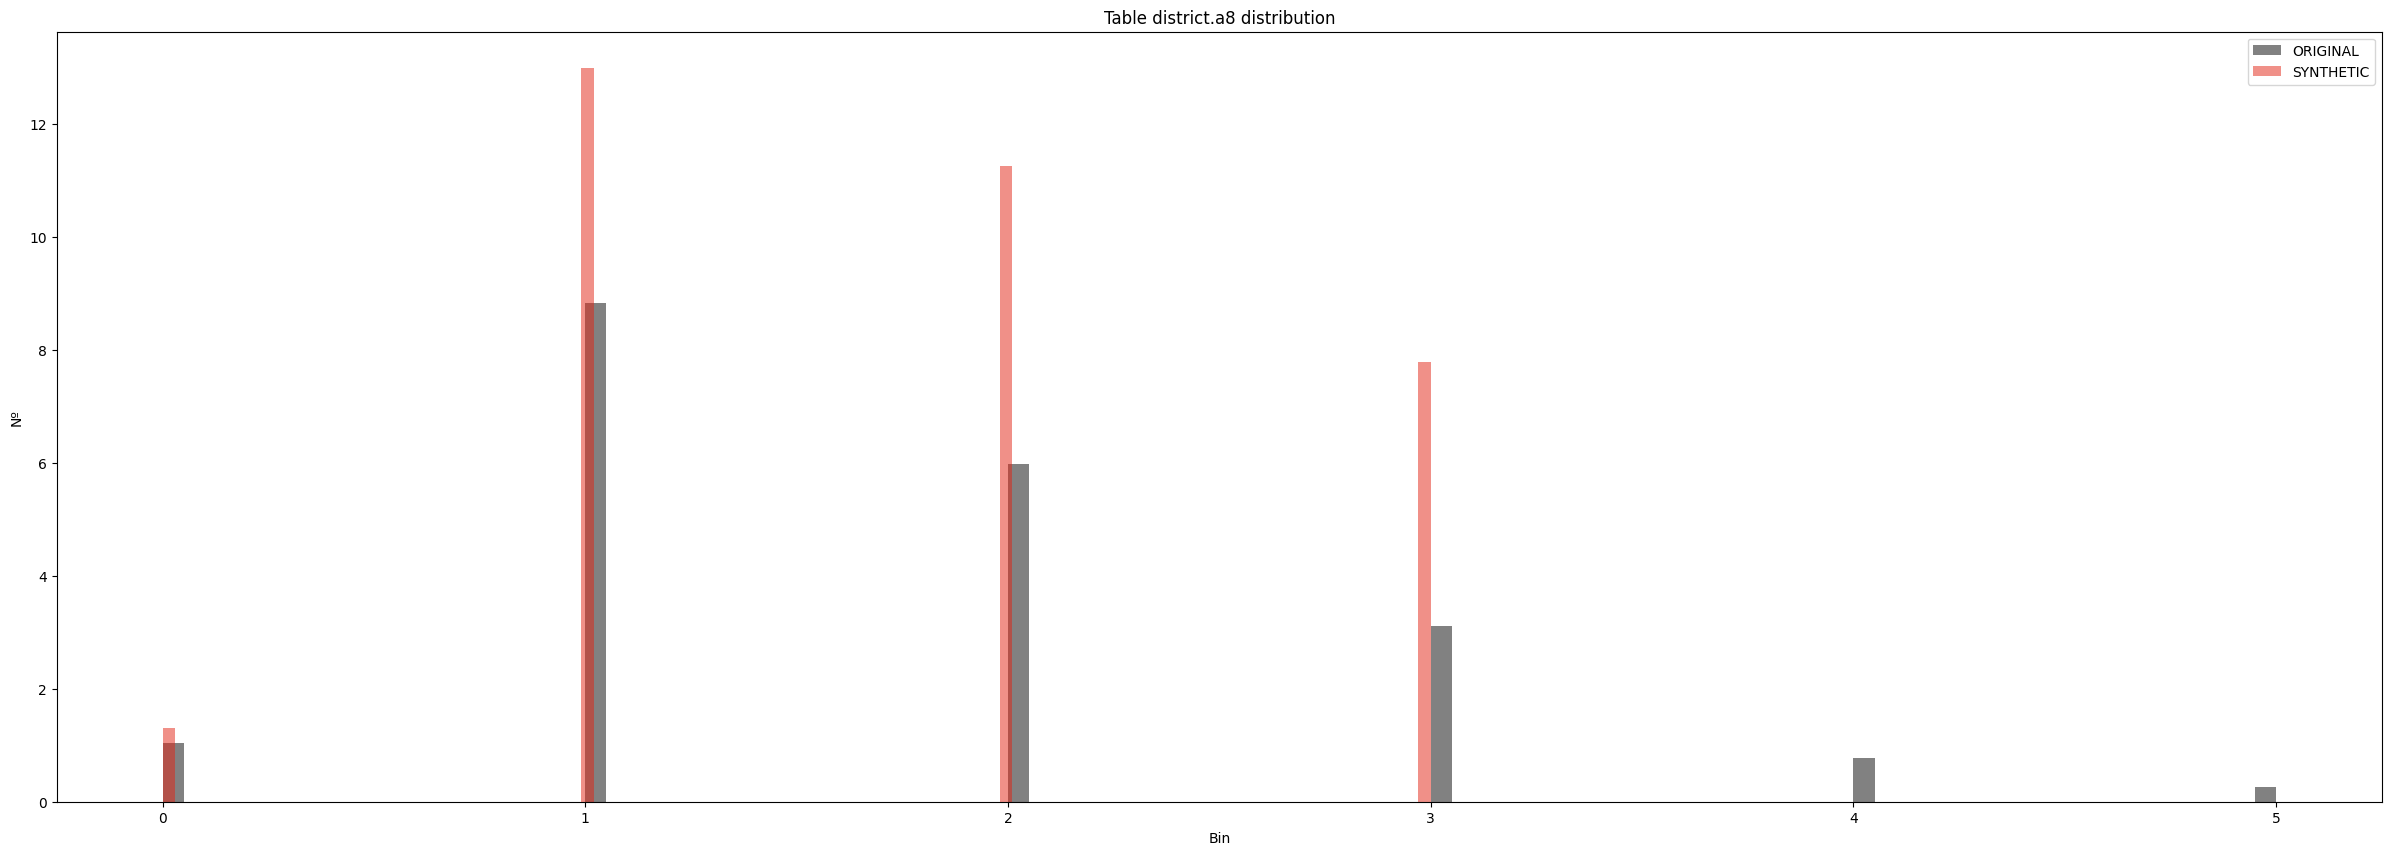

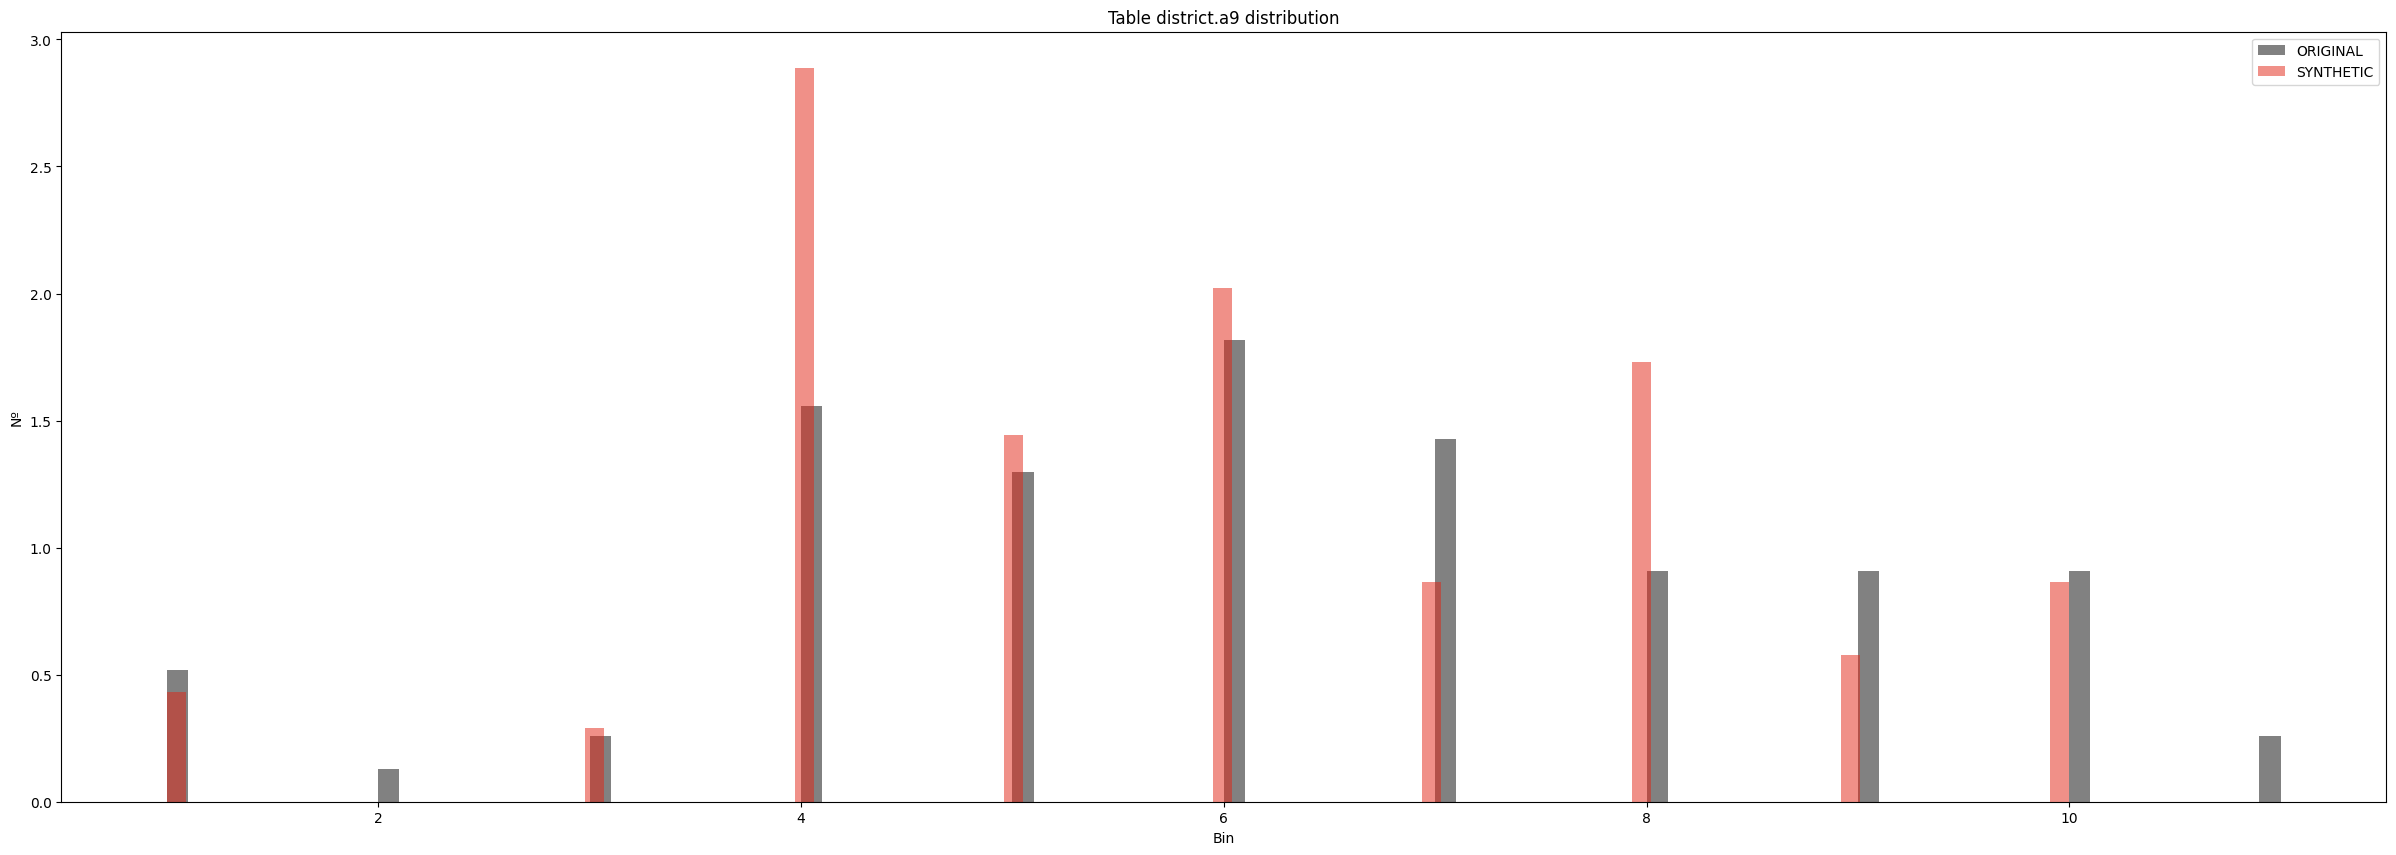

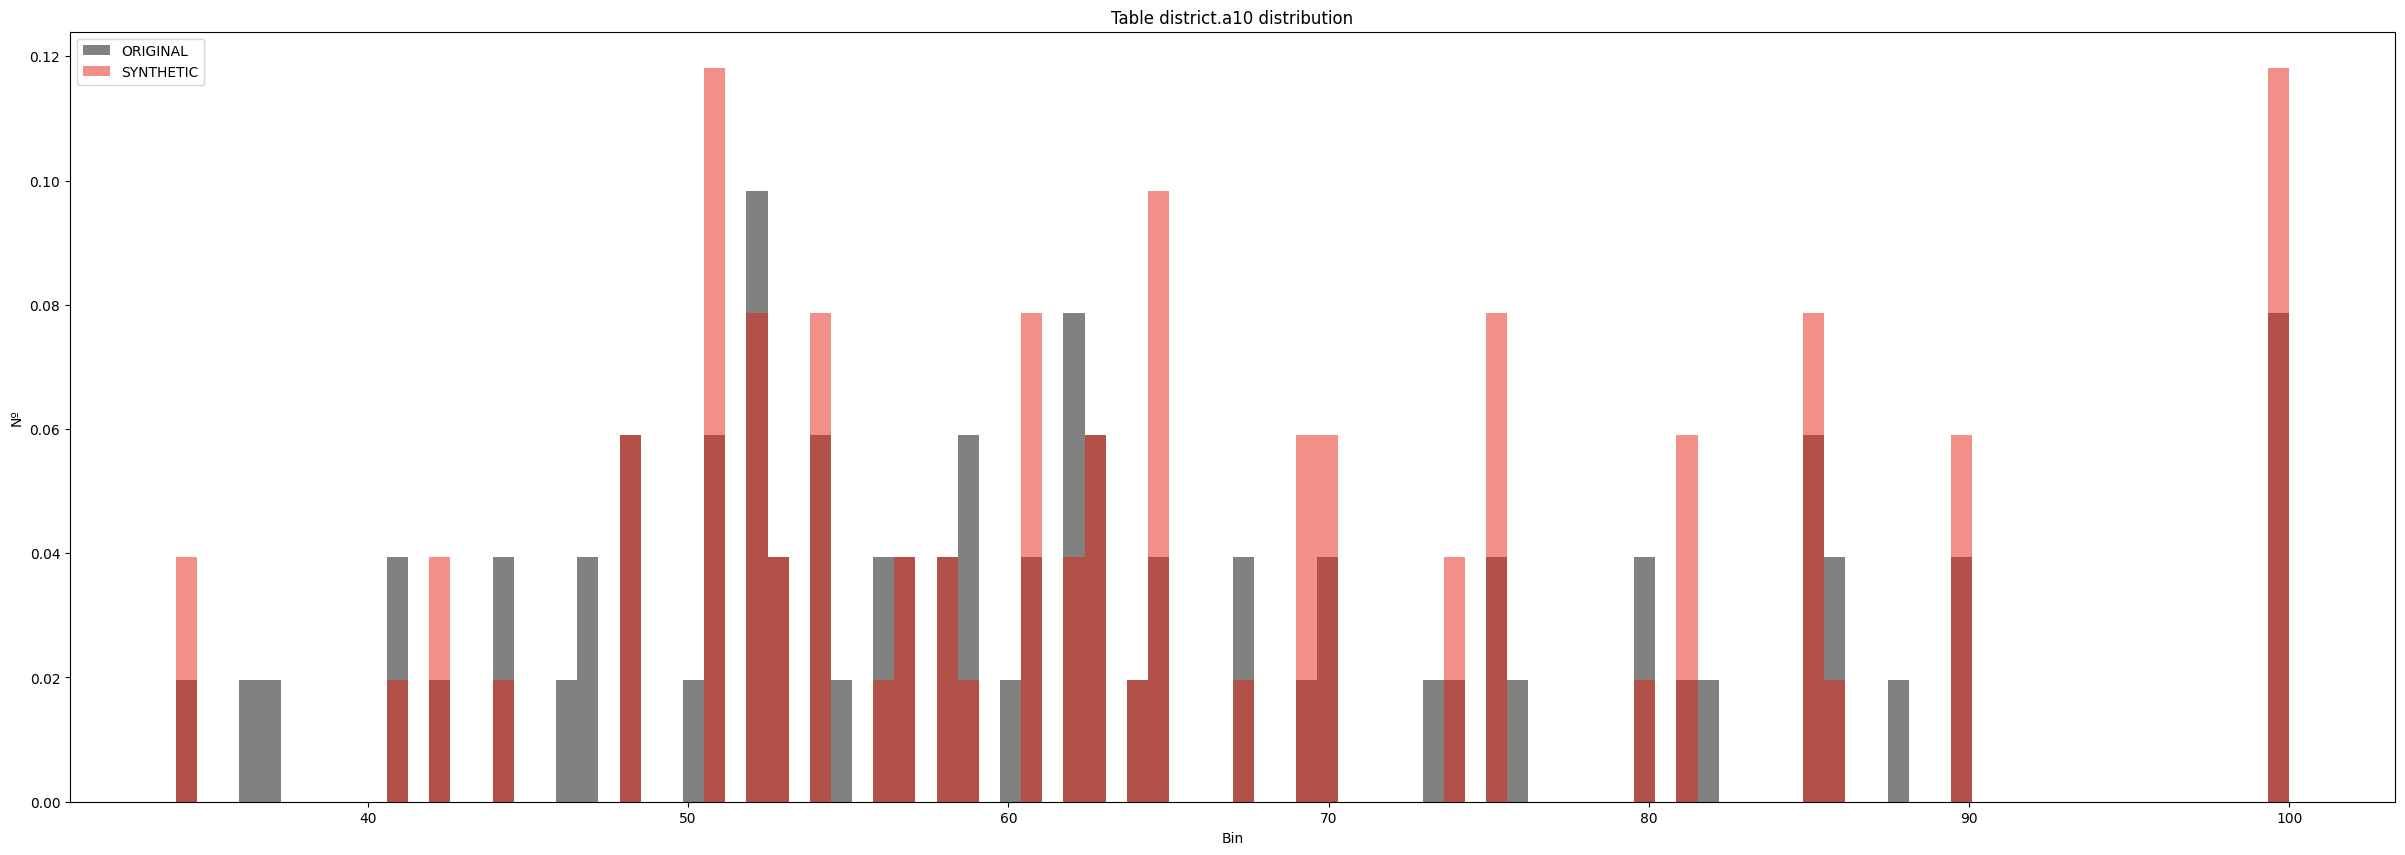

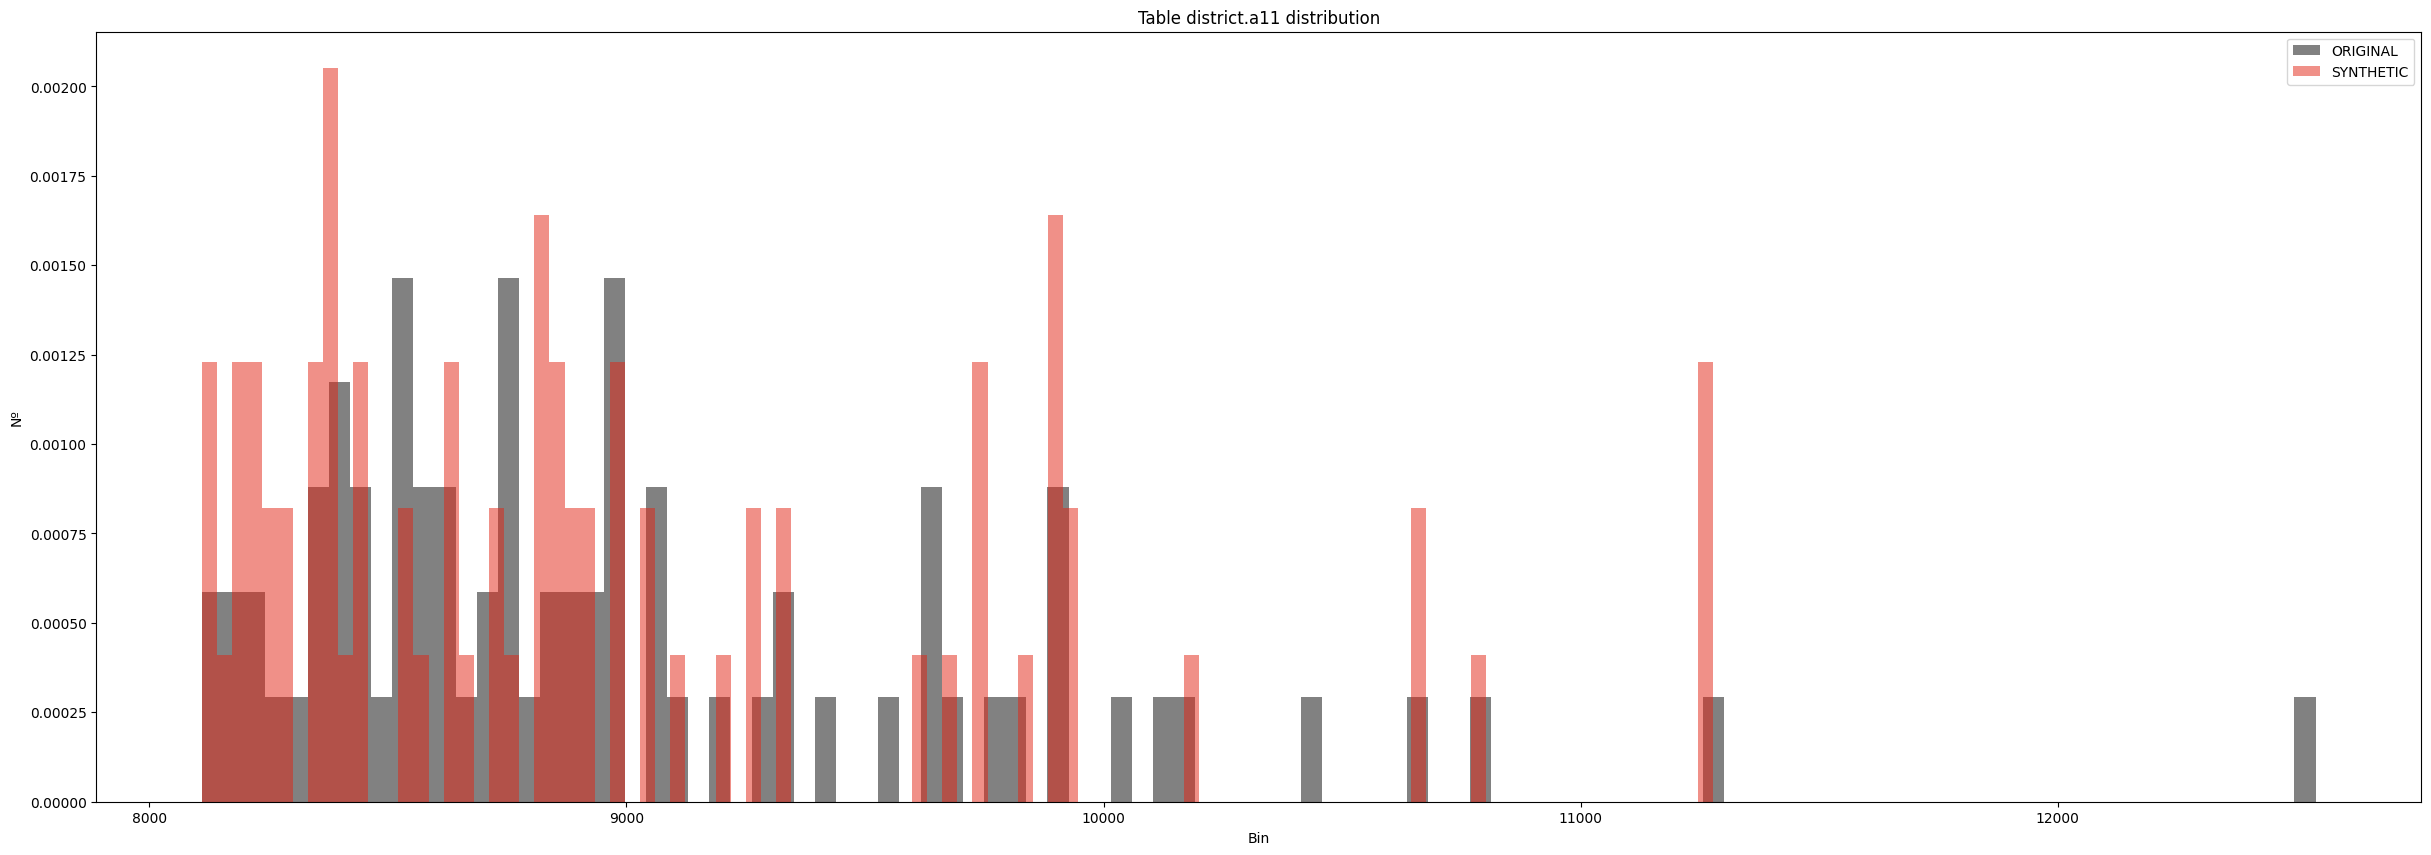

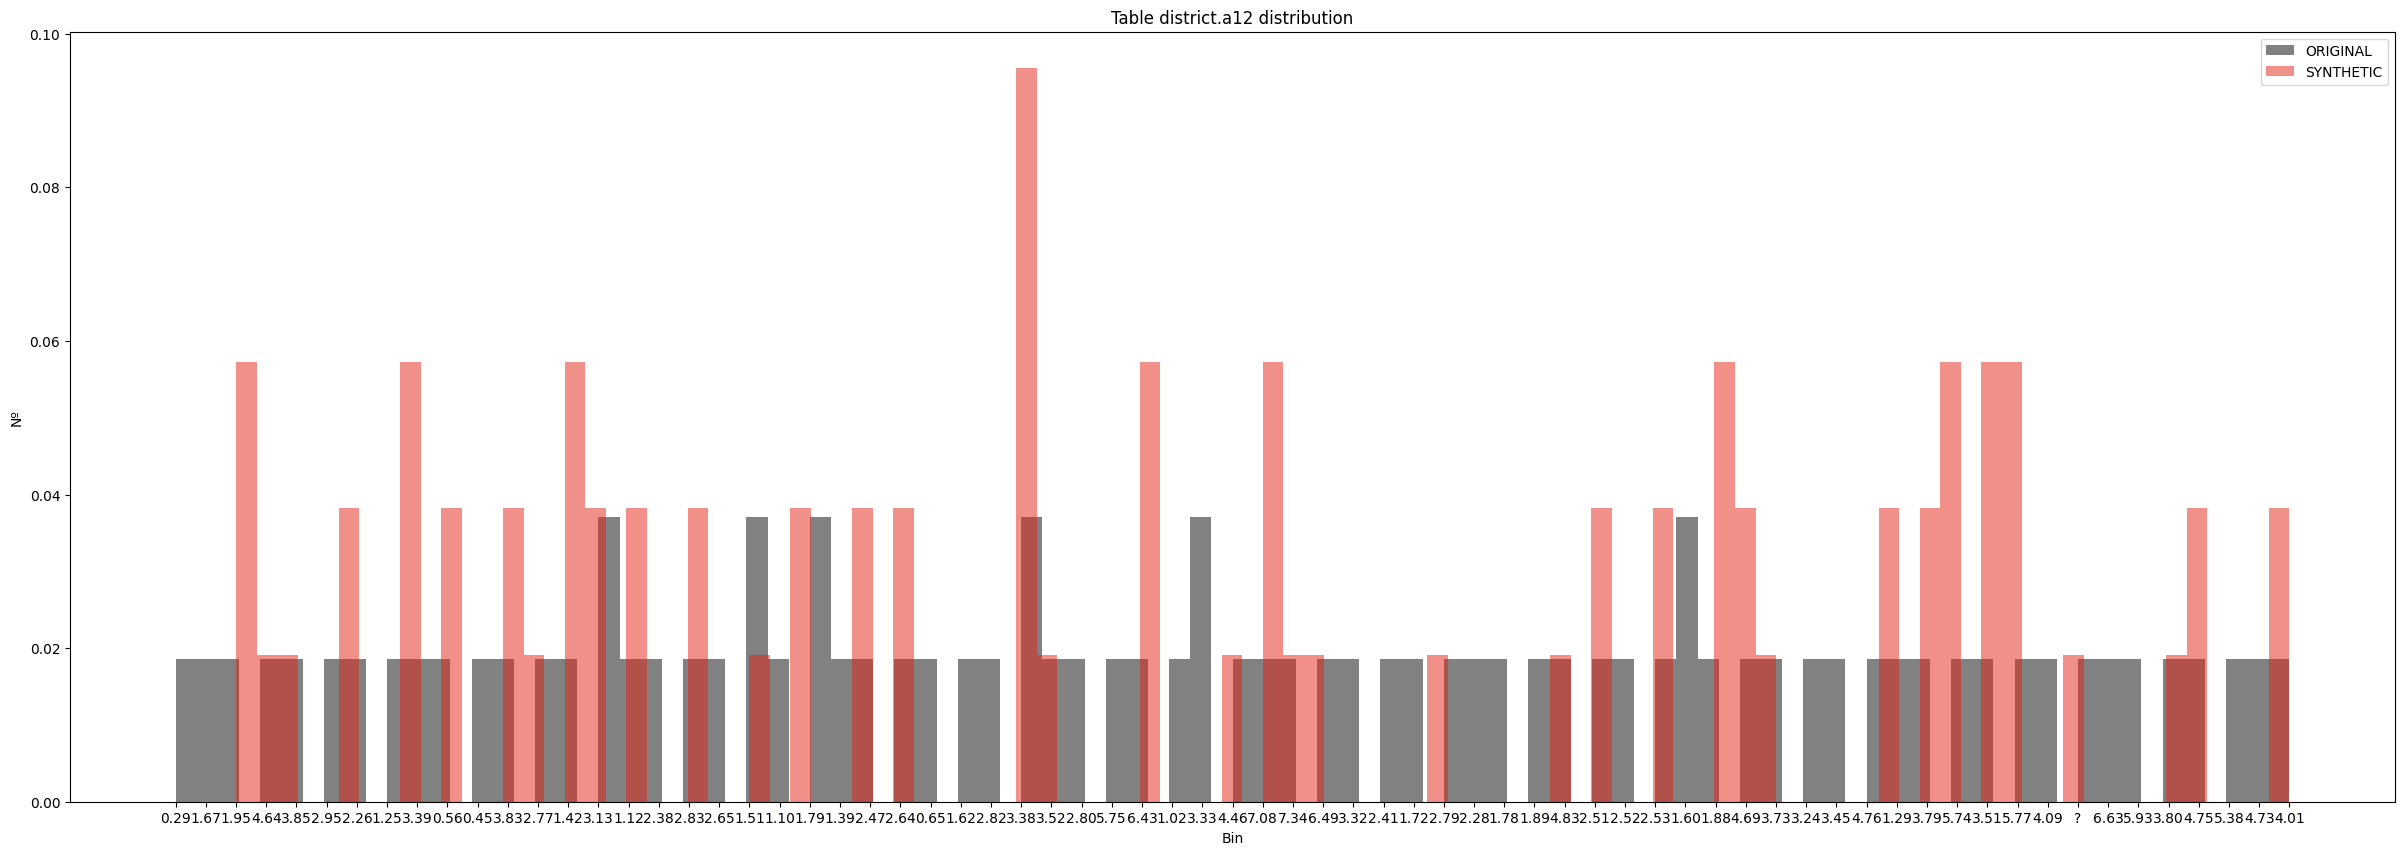

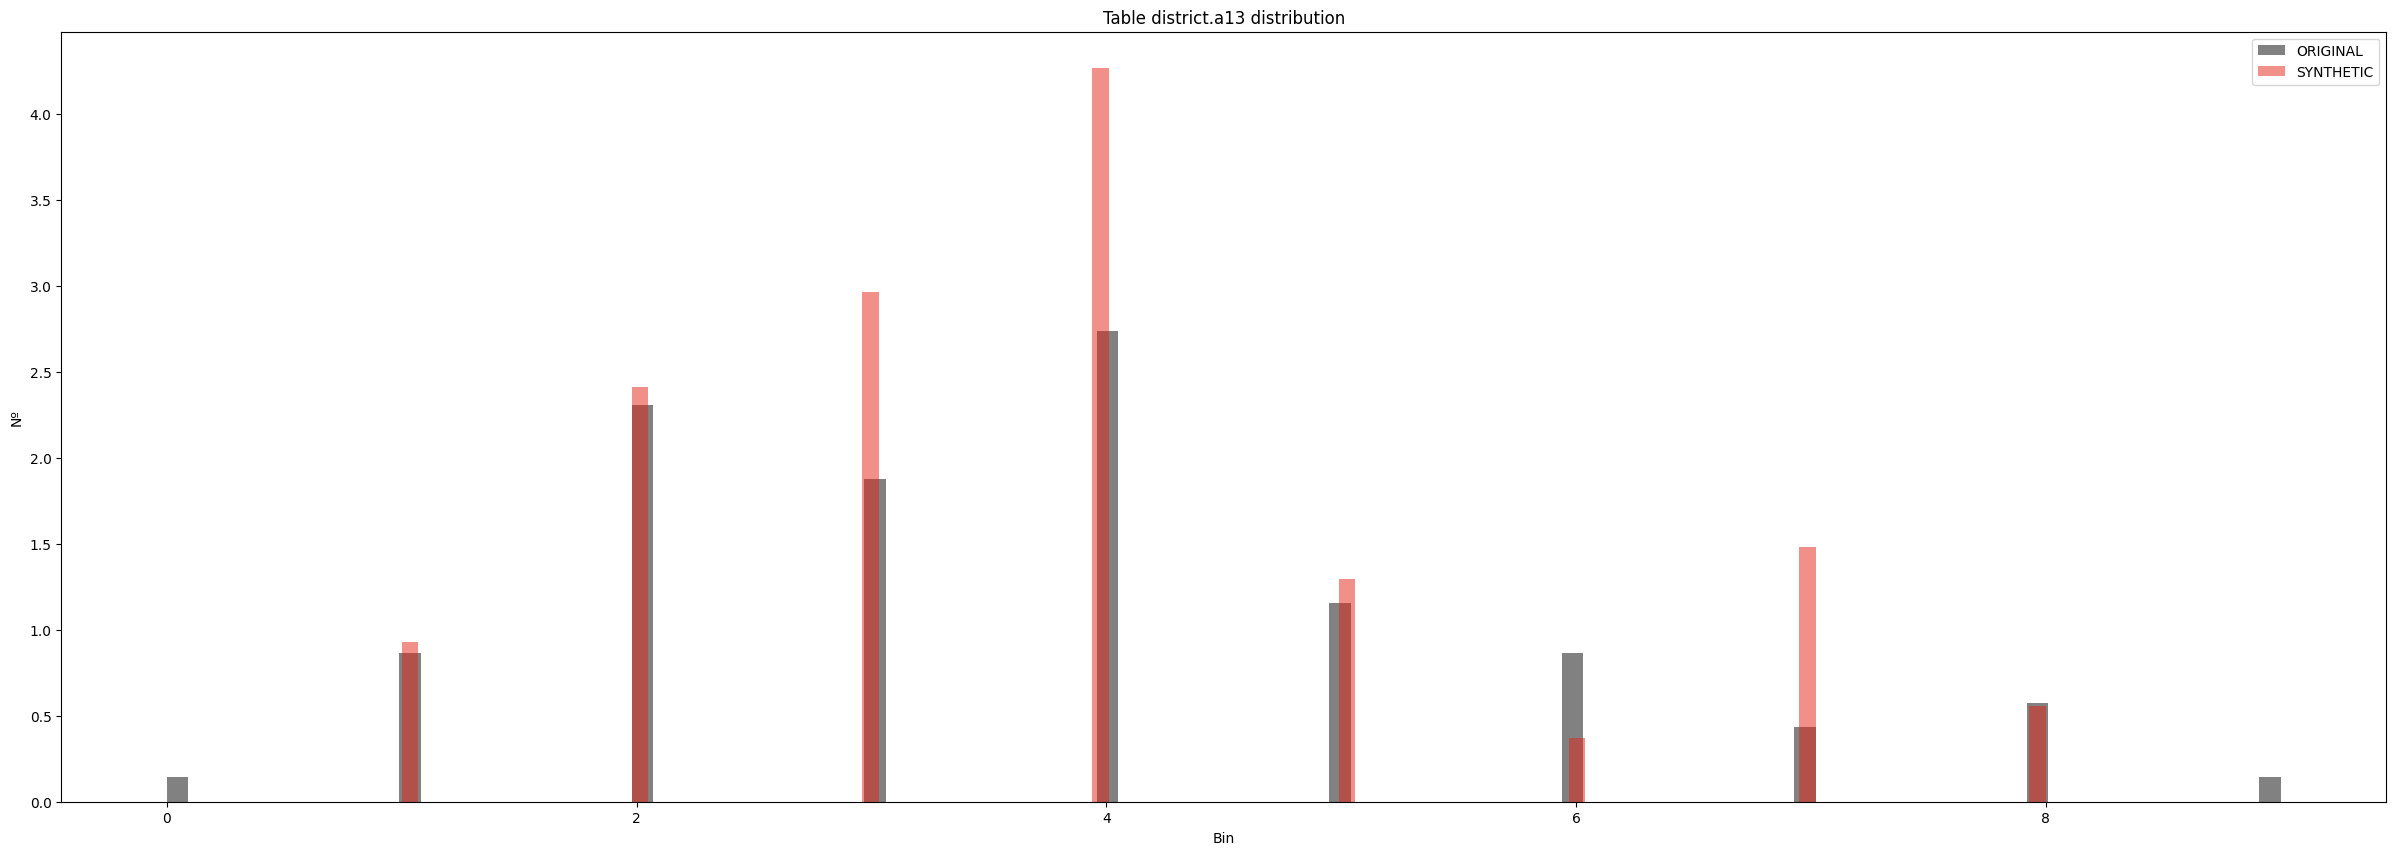

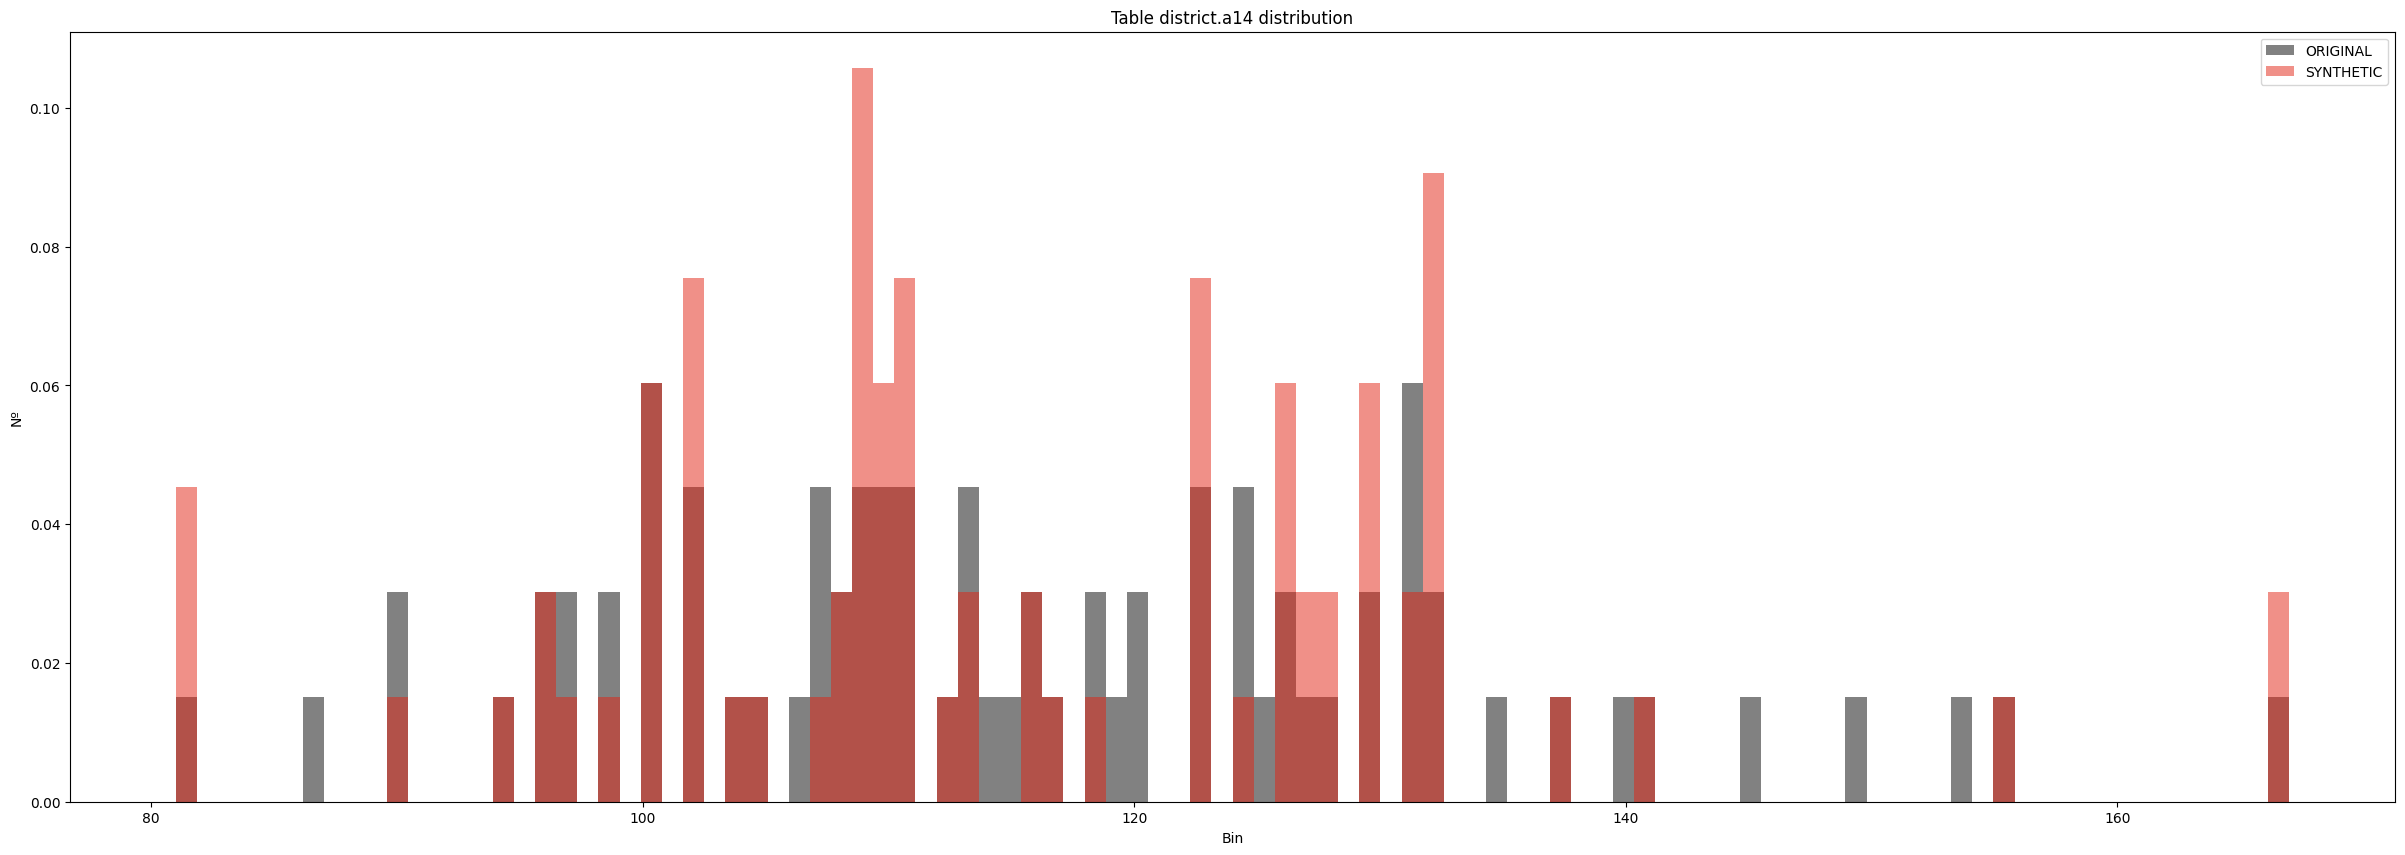

INFO: 2023-12-29 11:49:56,900 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


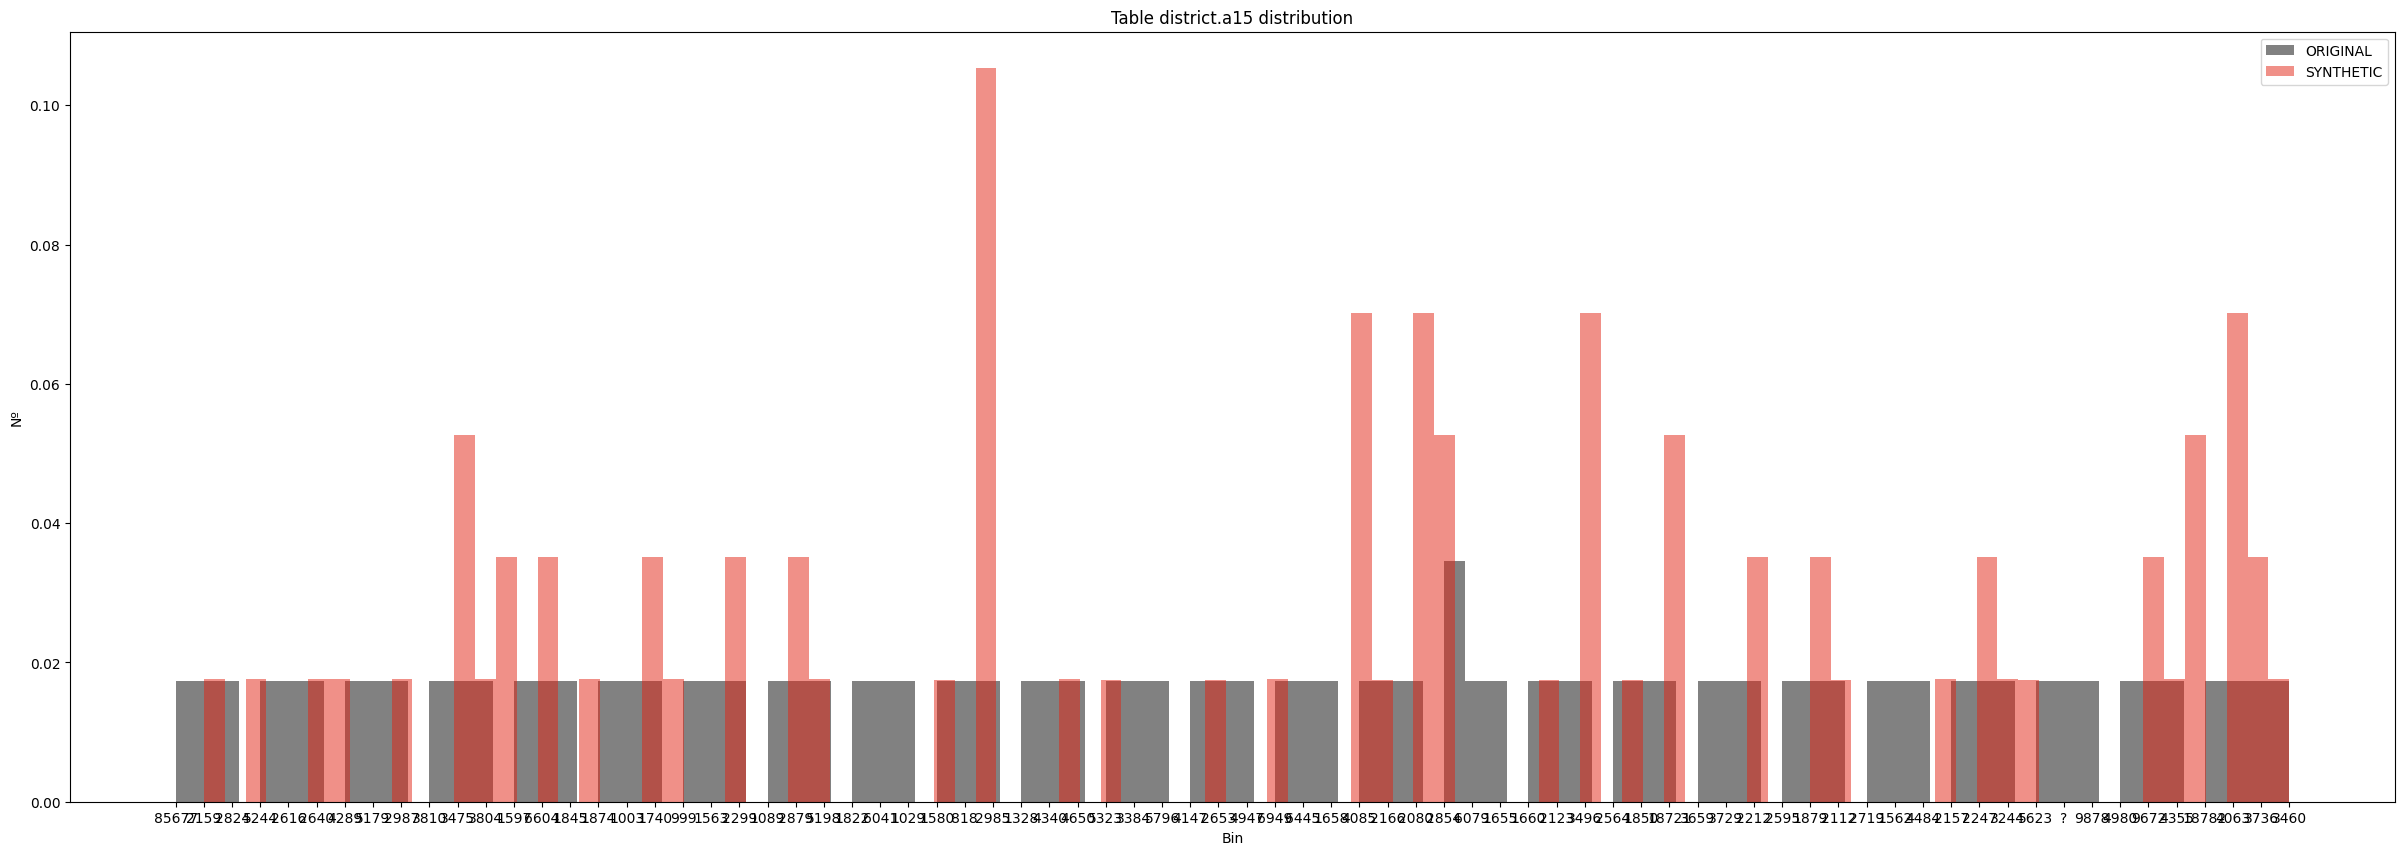

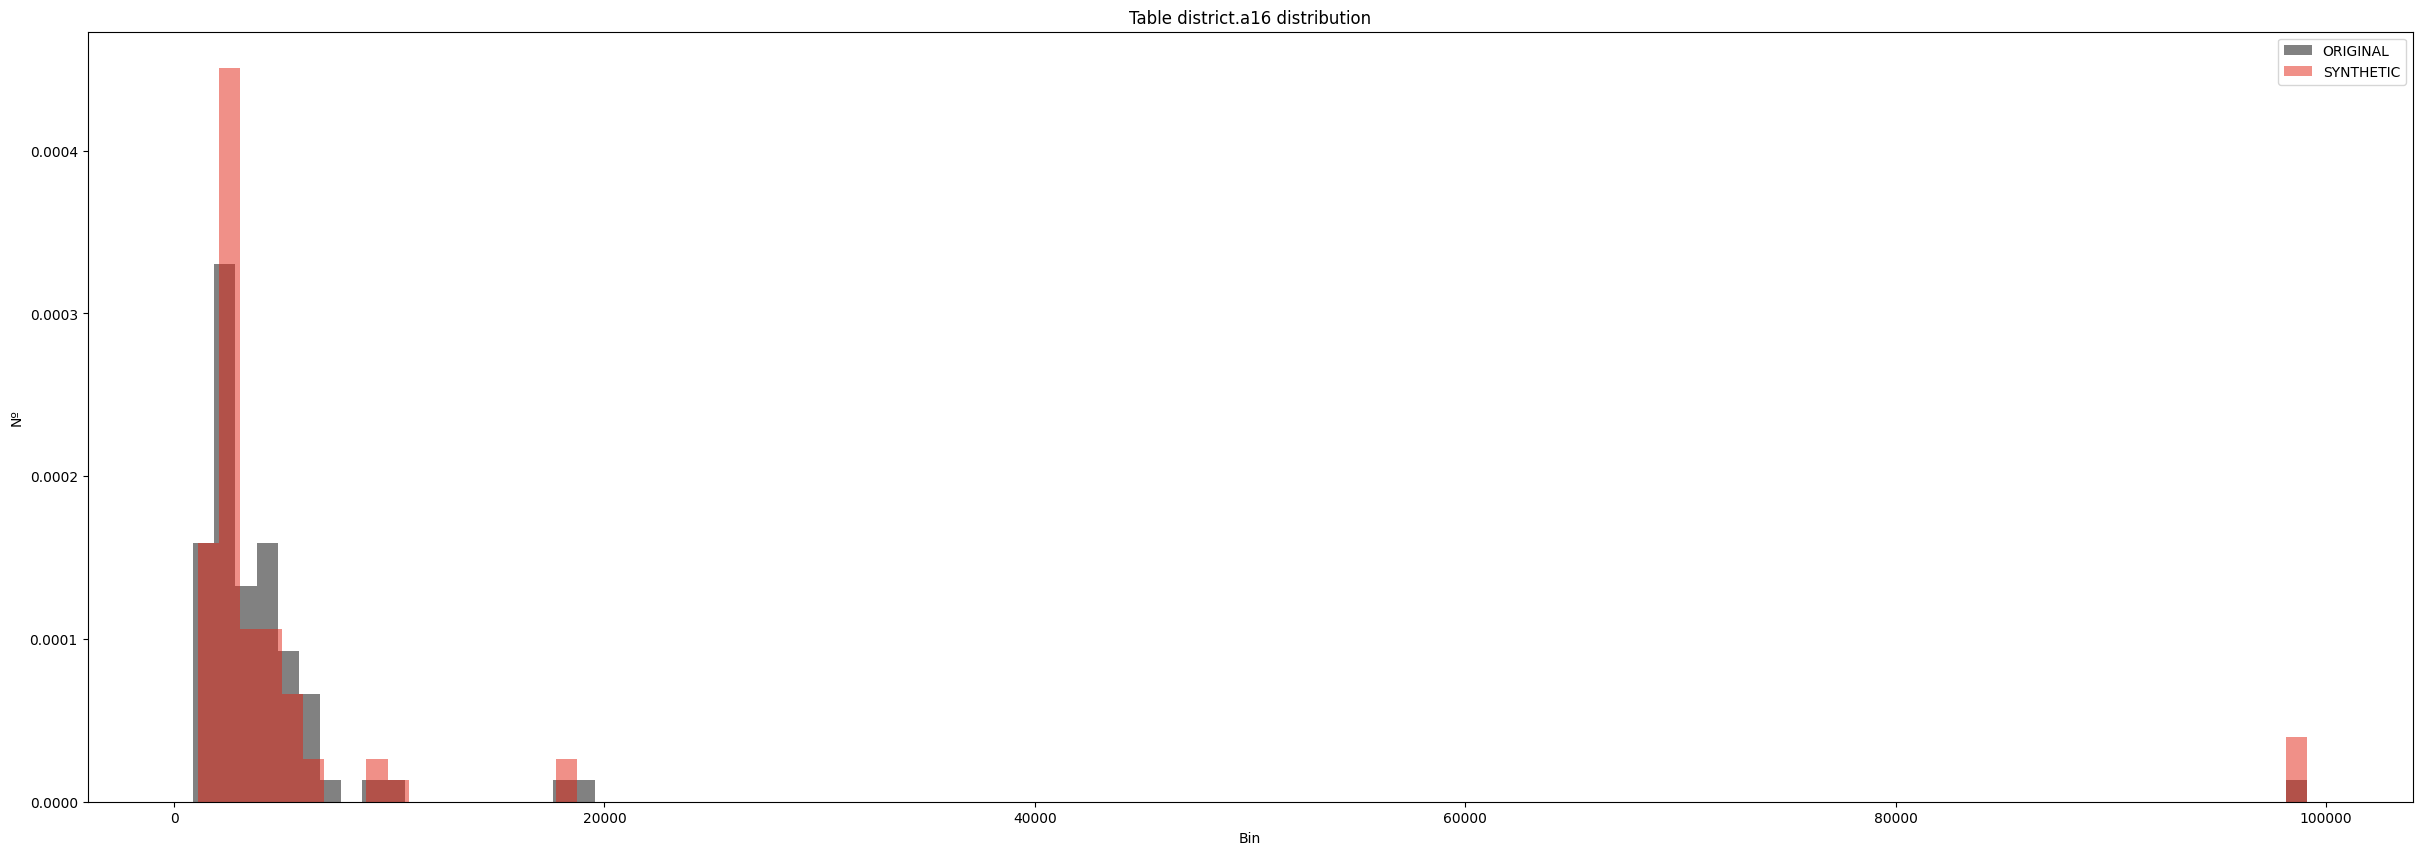

In [11]:
import matplotlib.pyplot as plt
for T in ['trans', 'account', 'district']:
    for c in data[T].columns:
        if c not in m.schema[T].primary_keys + [fk.column for fk in m.schema["trans"].foreign_keys]:
            plt.figure(figsize=[30, 10])
            plt.title(f"Table {T}.{c} distribution")
            data[T].to_pandas()[c].hist(color="#040404", label="ORIGINAL", grid=False, bins=100, alpha=0.5, density=True)
            sample[T].to_pandas()[c].hist(color="#E32212", label="SYNTHETIC", grid=False, bins=100, alpha=0.5, density=True)
            plt.xlabel("Bin")
            plt.ylabel("Nº")
            plt.legend()
            plt.show()